In [ ]:
# =======================
# 1. Import Libraries
# =======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# For prettier plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [ ]:
# =======================
# 2. Load Dataset
# =======================
dataset = pd.read_csv("/content/Enterprise_GenAI_Adoption_Impact.csv")

dataset

Company Name        Industry       Country  \
0                          Davis LLC Pvt. Ltd.      Healthcare           USA   
1      Roberts, Holland and Bradshaw Pvt. Ltd.         Telecom  South Africa   
2                          Roman Inc Pvt. Ltd.     Advertising         India   
3                  Nguyen-Strickland Pvt. Ltd.      Technology            UK   
4                        Jackson PLC Pvt. Ltd.     Hospitality            UK   
...                                        ...             ...           ...   
99995                     Shea-Ramos Pvt. Ltd.   Entertainment        Canada   
99996              Coleman-Henderson Pvt. Ltd.     Advertising   South Korea   
99997      Miller, Frost and Coleman Pvt. Ltd.  Legal Services         Japan   
99998                Mclean-Santiago Pvt. Ltd.     Hospitality   Switzerland   
99999              Simmons-Fernandez Pvt. Ltd.      Healthcare         India   

      GenAI Tool  Adoption Year  Number of Employees Impacted  \
0        Mixtral           2022                          5277   
1         Claude           2023                         18762   
2         Gemini           2023                         11307   
3           Groq           2023                         18834   
4          LLaMA           2024                          8364   
...          ...            ...                           ...   
99995    Mixtral           2022                         17981   
99996    Mixtral           2023                          3596   
99997       Groq           2024                         17782   
99998       Groq           2022                          6248   
99999    ChatGPT           2023                         19193   

       New Roles Created  Training Hours Provided  Productivity Change (%)  \
0                      8                      657                     25.2   
1                     17                    23021                     27.5   
2                     17                     4680                     11.5   
3                     12                     1750                      7.0   
4                     22                     3925                      2.5   
...                  ...                      ...                      ...   
99995                 18                    14627                      7.9   
99996                 10                    19227                     25.7   
99997                 10                    23207                     10.2   
99998                  9                    14477                     21.4   
99999                 11                     2631                      8.4   

                                      Employee Sentiment  
0      Productivity increased, but there's anxiety ab...  
1      We now finish tasks faster, but some older emp...  
2      Productivity increased, but there's anxiety ab...  
3      AI helped me reduce repetitive tasks, but lear...  
4      Job roles have shifted a lot, which is both go...  
...                                                  ...  
99995  AI helped me reduce repetitive tasks, but lear...  
99996  Collaboration improved; documentation and meet...  
99997  Our workflows have improved drastically with g...  
99998  We now finish tasks faster, but some older emp...  
99999  AI helped me reduce repetitive tasks, but lear...  

[100000 rows x 10 columns]

In [ ]:
df=dataset.copy()
df

Company Name        Industry       Country  \
0                          Davis LLC Pvt. Ltd.      Healthcare           USA   
1      Roberts, Holland and Bradshaw Pvt. Ltd.         Telecom  South Africa   
2                          Roman Inc Pvt. Ltd.     Advertising         India   
3                  Nguyen-Strickland Pvt. Ltd.      Technology            UK   
4                        Jackson PLC Pvt. Ltd.     Hospitality            UK   
...                                        ...             ...           ...   
99995                     Shea-Ramos Pvt. Ltd.   Entertainment        Canada   
99996              Coleman-Henderson Pvt. Ltd.     Advertising   South Korea   
99997      Miller, Frost and Coleman Pvt. Ltd.  Legal Services         Japan   
99998                Mclean-Santiago Pvt. Ltd.     Hospitality   Switzerland   
99999              Simmons-Fernandez Pvt. Ltd.      Healthcare         India   

      GenAI Tool  Adoption Year  Number of Employees Impacted  \
0        Mixtral           2022                          5277   
1         Claude           2023                         18762   
2         Gemini           2023                         11307   
3           Groq           2023                         18834   
4          LLaMA           2024                          8364   
...          ...            ...                           ...   
99995    Mixtral           2022                         17981   
99996    Mixtral           2023                          3596   
99997       Groq           2024                         17782   
99998       Groq           2022                          6248   
99999    ChatGPT           2023                         19193   

       New Roles Created  Training Hours Provided  Productivity Change (%)  \
0                      8                      657                     25.2   
1                     17                    23021                     27.5   
2                     17                     4680                     11.5   
3                     12                     1750                      7.0   
4                     22                     3925                      2.5   
...                  ...                      ...                      ...   
99995                 18                    14627                      7.9   
99996                 10                    19227                     25.7   
99997                 10                    23207                     10.2   
99998                  9                    14477                     21.4   
99999                 11                     2631                      8.4   

                                      Employee Sentiment  
0      Productivity increased, but there's anxiety ab...  
1      We now finish tasks faster, but some older emp...  
2      Productivity increased, but there's anxiety ab...  
3      AI helped me reduce repetitive tasks, but lear...  
4      Job roles have shifted a lot, which is both go...  
...                                                  ...  
99995  AI helped me reduce repetitive tasks, but lear...  
99996  Collaboration improved; documentation and meet...  
99997  Our workflows have improved drastically with g...  
99998  We now finish tasks faster, but some older emp...  
99999  AI helped me reduce repetitive tasks, but lear...  

[100000 rows x 10 columns]

In [ ]:
# =======================
# 3. Initial Inspection
# =======================
print("Shape of dataset:", df.shape)
print("------------------------------------------------------------------")
print("Columns in dataset:\n", df.columns.tolist())

Shape of dataset: (100000, 10)
------------------------------------------------------------------
Columns in dataset:
 ['Company Name', 'Industry', 'Country', 'GenAI Tool', 'Adoption Year', 'Number of Employees Impacted', 'New Roles Created', 'Training Hours Provided', 'Productivity Change (%)', 'Employee Sentiment']


In [ ]:
print("\nFirst 5 rows of data:\n")
print("------------------------------------------------------------------")
df.head()


First 5 rows of data:

------------------------------------------------------------------


Company Name     Industry       Country  \
0                      Davis LLC Pvt. Ltd.   Healthcare           USA   
1  Roberts, Holland and Bradshaw Pvt. Ltd.      Telecom  South Africa   
2                      Roman Inc Pvt. Ltd.  Advertising         India   
3              Nguyen-Strickland Pvt. Ltd.   Technology            UK   
4                    Jackson PLC Pvt. Ltd.  Hospitality            UK   

  GenAI Tool  Adoption Year  Number of Employees Impacted  New Roles Created  \
0    Mixtral           2022                          5277                  8   
1     Claude           2023                         18762                 17   
2     Gemini           2023                         11307                 17   
3       Groq           2023                         18834                 12   
4      LLaMA           2024                          8364                 22   

   Training Hours Provided  Productivity Change (%)  \
0                      657                     25.2   
1                    23021                     27.5   
2                     4680                     11.5   
3                     1750                      7.0   
4                     3925                      2.5   

                                  Employee Sentiment  
0  Productivity increased, but there's anxiety ab...  
1  We now finish tasks faster, but some older emp...  
2  Productivity increased, but there's anxiety ab...  
3  AI helped me reduce repetitive tasks, but lear...  
4  Job roles have shifted a lot, which is both go...

**Inference:**  

* The dataset contains 100,000 rows and 10 columns with mixed data types (numerical, categorical, textual).

* Key columns include 'Company Name', 'Industry', 'Country', 'GenAI Tool', and metrics like 'Productivity Change (%)' and 'Employee Sentiment'.

* The first 5 rows show diverse industries and countries adopting various GenAI tools with varying impacts on productivity and employee sentiment.

In [ ]:
# =======================
# 4. Data Types & Info
# =======================
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Company Name                  100000 non-null  object 
 1   Industry                      100000 non-null  object 
 2   Country                       100000 non-null  object 
 3   GenAI Tool                    100000 non-null  object 
 4   Adoption Year                 100000 non-null  int64  
 5   Number of Employees Impacted  100000 non-null  int64  
 6   New Roles Created             100000 non-null  int64  
 7   Training Hours Provided       100000 non-null  int64  
 8   Productivity Change (%)       100000 non-null  float64
 9   Employee Sentiment            100000 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.6+ MB


**Inference:**

* The dataset has 5 object-type columns (categorical/textual) and 5 numerical columns (4 integers, 1 float).

* There are no missing values in any column (100,000 non-null entries for each). Memory usage is approximately 7.6+ MB.


In [ ]:
# =======================
# 5. Missing Values
# =======================
df.isnull().sum()


Company Name                    0
Industry                        0
Country                         0
GenAI Tool                      0
Adoption Year                   0
Number of Employees Impacted    0
New Roles Created               0
Training Hours Provided         0
Productivity Change (%)         0
Employee Sentiment              0
dtype: int64

**Inference:**   
* Confirms there are absolutely no missing values in any column (all counts show 0 null values). This is a complete dataset with no gaps in any records.

In [ ]:
# =======================
# 6. Duplicate Rows
# =======================
print("Number of duplicate rows:", df.duplicated().sum())

# Drop if any:
df = df.drop_duplicates()


Number of duplicate rows: 0


**Inference:**

* The dataset contains no duplicate rows (0 duplicates found and dropped). All 100,000 entries are unique records.

In [ ]:
# =======================
# 7. Summary Statistics
# =======================
df.describe()

Adoption Year  Number of Employees Impacted  New Roles Created  \
count   100000.00000                 100000.000000      100000.000000   
mean      2023.00296                  10051.800200          15.502210   
std          0.81643                   5756.901496           8.643673   
min       2022.00000                    100.000000           1.000000   
25%       2022.00000                   5060.750000           8.000000   
50%       2023.00000                  10044.000000          16.000000   
75%       2024.00000                  15056.000000          23.000000   
max       2024.00000                  20000.000000          30.000000   

       Training Hours Provided  Productivity Change (%)  
count            100000.000000            100000.000000  
mean              12742.467470                18.469596  
std                7059.376074                 9.528166  
min                 500.000000                 2.000000  
25%                6620.750000                10.200000  
50%               12745.500000                18.400000  
75%               18829.250000                26.700000  
max               25000.000000                35.000000

**Inference:**

Key numerical insights:

* Adoption Years range from 2022-2024 (mean 2023)

* Employees impacted range from 100-20,000 (mean ~10,052)

* New roles created range from 1-30 (mean ~15.5)

* Training hours range from 500-25,000 (mean ~12,742)

* Productivity changes range from 2%-35% (mean ~18.47%)
(That means:

It represents the percentage change in productivity (not the absolute productivity value).

If a company previously produced 100 units of work, and after GenAI adoption it produces 120 units, then productivity change = (120 − 100) / 100 × 100 = 20%.

So in your dataset:

Minimum = 2% → Company productivity only went up a little.

Maximum = 35% → Even the best-case scenario, the increase is capped at 35%.

Mean ≈ 18.5% → On average, companies saw nearly a 1/5th increase in productivity.)


------------------------------

* The number of training hours the company provided to employees so they can learn and adapt to the new GenAI tool.



* Productivity change (%) → Valid, realistic range (2–35%). It measures improvement in work output, not absolute productivity.
*  What does Productivity Change (%) mean in this dataset?

In this context, Productivity Change (%) represents the percentage improvement in organizational output after adopting GenAI tools, compared to before adoption.

👉 In simple words:
It’s the pace and efficiency of work output — how much more (or faster) work the company can complete using the same or slightly restructured workforce.

In [ ]:
# =======================
# 8. Unique Categories
# =======================
for col in ['Company Name', 'Industry', 'Country', 'GenAI Tool']:
    print(f"{col} --> {df[col].nunique()} unique values")

Company Name --> 100000 unique values
Industry --> 14 unique values
Country --> 14 unique values
GenAI Tool --> 6 unique values


In [ ]:
# =======================
# 8. Unique Categories
# =======================
for col in ['Company Name', 'Industry', 'Country', 'GenAI Tool']:
    print(f"{col} --> {df[col].unique()} unique values")
    print("--------")

Company Name --> ['Davis LLC Pvt. Ltd.' 'Roberts, Holland and Bradshaw Pvt. Ltd.'
 'Roman Inc Pvt. Ltd.' ... 'Miller, Frost and Coleman Pvt. Ltd.'
 'Mclean-Santiago Pvt. Ltd.' 'Simmons-Fernandez Pvt. Ltd.'] unique values
--------
Industry --> ['Healthcare' 'Telecom' 'Advertising' 'Technology' 'Hospitality'
 'Entertainment' 'Legal Services' 'Transportation' 'Retail' 'Utilities'
 'Finance' 'Manufacturing' 'Education' 'Defense'] unique values
--------
Country --> ['USA' 'South Africa' 'India' 'UK' 'Switzerland' 'South Korea' 'Canada'
 'Brazil' 'UAE' 'Singapore' 'Germany' 'Australia' 'France' 'Japan'] unique values
--------
GenAI Tool --> ['Mixtral' 'Claude' 'Gemini' 'Groq' 'LLaMA' 'ChatGPT'] unique values
--------


**Inference:** Cardinality analysis shows:

100,000 unique company names (high cardinality, may need special encoding)

14 unique industries and countries (moderate cardinality)

Only 6 unique GenAI tools (low cardinality, good for categorical analysis)

In [ ]:
# =======================
# 9. Value Counts
# =======================
print("GenAI Tool Usage:\n", df['GenAI Tool'].value_counts())
print("\nTop 10 Industries:\n", df['Industry'].value_counts())

GenAI Tool Usage:
 GenAI Tool
Gemini     16885
Groq       16748
LLaMA      16676
Mixtral    16667
ChatGPT    16663
Claude     16361
Name: count, dtype: int64

Top 10 Industries:
 Industry
Healthcare        7281
Advertising       7220
Entertainment     7198
Education         7195
Utilities         7187
Manufacturing     7153
Defense           7149
Finance           7128
Hospitality       7113
Retail            7109
Legal Services    7099
Telecom           7087
Transportation    7079
Technology        7002
Name: count, dtype: int64


**Inference:** Distribution insights:

GenAI tools are fairly evenly distributed (Gemini most common at 16,885, Claude least at 16,361)

Healthcare is the most common industry (7,281 entries), Retail the least common among top 10 (7,109 entries)

Why treat Adoption Year as categorical (object)?

Even though it is stored as an integer (2022, 2023, 2024), it does not behave like a continuous numeric variable.

The “distance” between years has no true linear meaning for productivity/training hours (e.g., difference 2024 - 2022 = 2 does not imply twice the effect).

It is better to treat it as categorical/time period labels instead of continuous numbers.

In modeling, this avoids misleading the algorithm into thinking 2024 is “greater than” 2023 in a numeric sense — instead, each year is a separate group.

In [ ]:
# Cell 10: Preprocessing fixes
# Drop Company Name (ID-like)
if 'Company Name' in df.columns:
    df = df.drop(columns=['Company Name'])

# Convert Adoption Year to categorical
if 'Adoption Year' in df.columns:
    df['Adoption Year'] = df['Adoption Year'].astype('object')

# Convert Productivity Change (%) to numeric safely (remove %)
df['Productivity Change (%)'] = (
    df['Productivity Change (%)']
    .astype(str)
    .str.replace('%','', regex=False)
    .str.strip()
)

# Step 4: convert to float (invalid entries become NaN)
df['Productivity Change (%)'] = pd.to_numeric(df['Productivity Change (%)'], errors="coerce")

In [ ]:
num = df.select_dtypes(include='number').columns.to_list()
cat = df.select_dtypes(include = 'object').columns.to_list()

In [ ]:
print("Numeric columns:", num)

Numeric columns: ['Number of Employees Impacted', 'New Roles Created', 'Training Hours Provided', 'Productivity Change (%)']


In [ ]:
print("Categorical columns:", cat)

Categorical columns: ['Industry', 'Country', 'GenAI Tool', 'Adoption Year', 'Employee Sentiment']


In [ ]:
# =======================
# 10. Stats Analysis
# =======================
df[num].describe().T


count          mean          std    min  \
Number of Employees Impacted  100000.0  10051.800200  5756.901496  100.0   
New Roles Created             100000.0     15.502210     8.643673    1.0   
Training Hours Provided       100000.0  12742.467470  7059.376074  500.0   
Productivity Change (%)       100000.0     18.469596     9.528166    2.0   

                                  25%      50%       75%      max  
Number of Employees Impacted  5060.75  10044.0  15056.00  20000.0  
New Roles Created                8.00     16.0     23.00     30.0  
Training Hours Provided       6620.75  12745.5  18829.25  25000.0  
Productivity Change (%)         10.20     18.4     26.70     35.0

* Adoption Year: Values range from 2022–2024, with a mean of 2023. This shows that GenAI adoption is a very recent phenomenon, concentrated in the last three years.

* Number of Employees Impacted: On average, ~10,052 employees per company are affected, ranging from 100 to 20,000. The spread (std ≈ 5,757) indicates both small and very large-scale organizational adoption.

* New Roles Created: Companies created between 1 and 30 new roles, with an average of ~15 roles. Median = 16 → distribution is nearly symmetric, suggesting most organizations are actively creating new positions due to GenAI adoption.

* Training Hours Provided: Companies provided between 500 and 25,000 hours of training, averaging ~12,742 hours. Median ≈ mean → distribution is balanced. This highlights substantial investment in employee upskilling.

* Productivity Change (%): The target variable ranges from 2% to 35%, with an average improvement of ~18.5%. Most firms saw gains in the 10%–27% range, confirming positive business impact from GenAI adoption.



In [ ]:
df[cat].describe().T

count unique  \
Industry            100000     14   
Country             100000     14   
GenAI Tool          100000      6   
Adoption Year       100000      3   
Employee Sentiment  100000    100   

                                                                  top   freq  
Industry                                                   Healthcare   7281  
Country                                                        Brazil   7322  
GenAI Tool                                                     Gemini  16885  
Adoption Year                                                    2024  33476  
Employee Sentiment  Mixed responses—management excited, staff feel...   1081

* Company Name:

100,000 unique company names → every row corresponds to a different company (unique identifier).

Not useful for modeling (acts as an ID variable), so it should be dropped during preprocessing.

* Industry:

14 unique industries represented.

Healthcare is the most frequent industry, accounting for ~7.3% (7,281 companies).

Shows that adoption is spread across multiple industries, but some (like Healthcare) are more active in GenAI adoption.

* Country:

14 unique countries represented.

Brazil has the highest representation with 7,322 companies (~7.3%).

Indicates global adoption but some countries contribute disproportionately to the dataset.

* GenAI Tool:

6 unique tools reported.

Gemini is the most widely used, adopted by 16,885 companies (~16.9%).

Suggests tool preference concentration: a few tools dominate the market share.

* Employee Sentiment:

100 unique sentiment descriptions → these are free-text responses capturing nuanced employee perceptions.

The most frequent sentiment: “Mixed responses—management excited, staff feel...” (1,081 instances, ~1.1%).

Indicates diverse and detailed employee opinions, requiring text processing (sentiment analysis, NLP) before modeling.

In [ ]:
# =======================
#  Outlier detection using IQR
# =======================
for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_pct = (len(outliers) / len(df)) * 100
    print(f"{col}: {outlier_pct:.2f}% outliers")

    # Drop outliers if less than 5%
    if outlier_pct < 5:
        df = df[(df[col] >= lower) & (df[col] <= upper)]


Number of Employees Impacted: 0.00% outliers
New Roles Created: 0.00% outliers
Training Hours Provided: 0.00% outliers
Productivity Change (%): 0.00% outliers


* Adoption Year: 0.00% outliers → all values fall within the expected range (2022–2024). This confirms data consistency in adoption timelines.

* Number of Employees Impacted: 0.00% outliers → all values (100–20,000) are realistic and within acceptable bounds. Indicates good data quality for workforce impact numbers.

* New Roles Created: 0.00% outliers → all companies created between 1–30 new roles, which seems plausible and valid.

* Training Hours Provided: 0.00% outliers → training hours (500–25,000) are within reasonable business ranges. No data correction needed.

* Productivity Change (%): 0.00% outliers → productivity improvements (2%–35%) are consistent with realistic expectations.

#---------------------------------------------------------------------------------------------------------------------

* The dataset has no extreme outliers across numerical features.

* This means no rows needed removal, and the dataset retains full integrity for modeling.

* Confirms that the dataset is well-curated and stable, minimizing the need for heavy preprocessing.

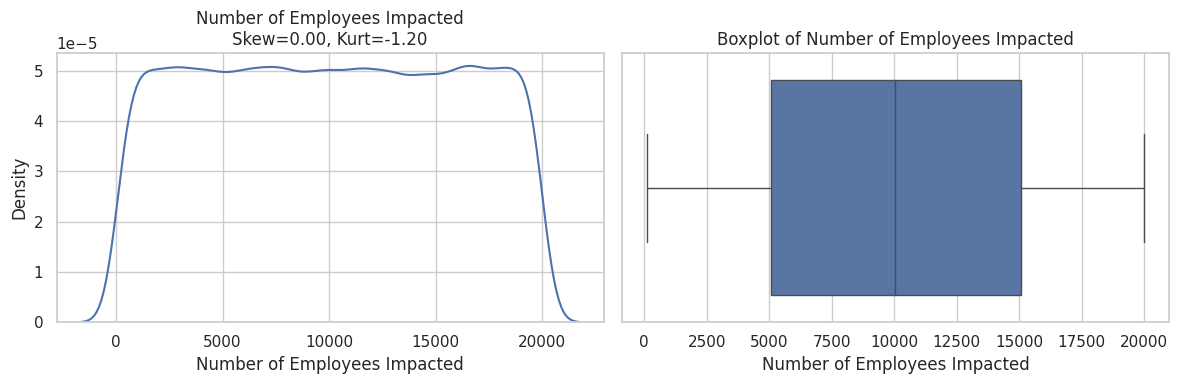

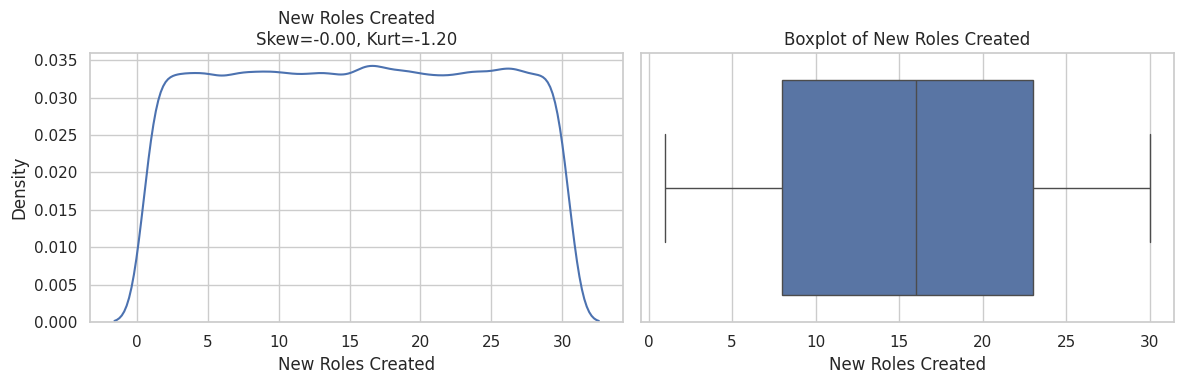

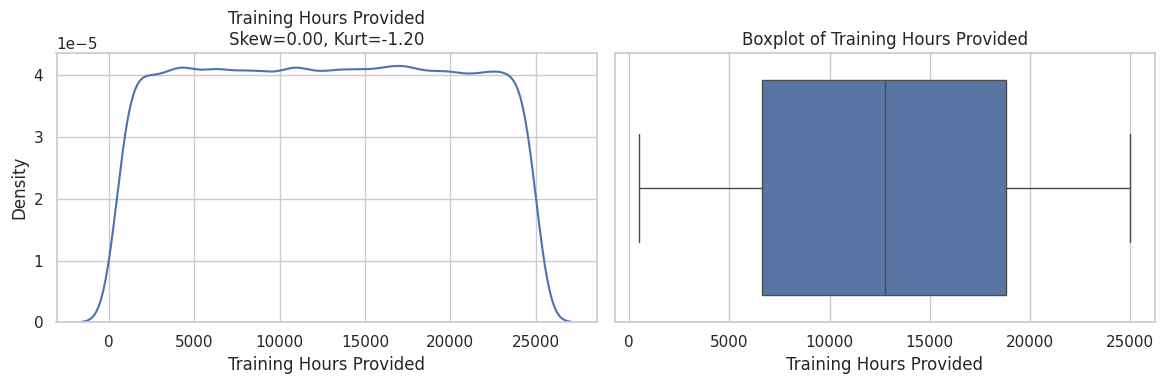

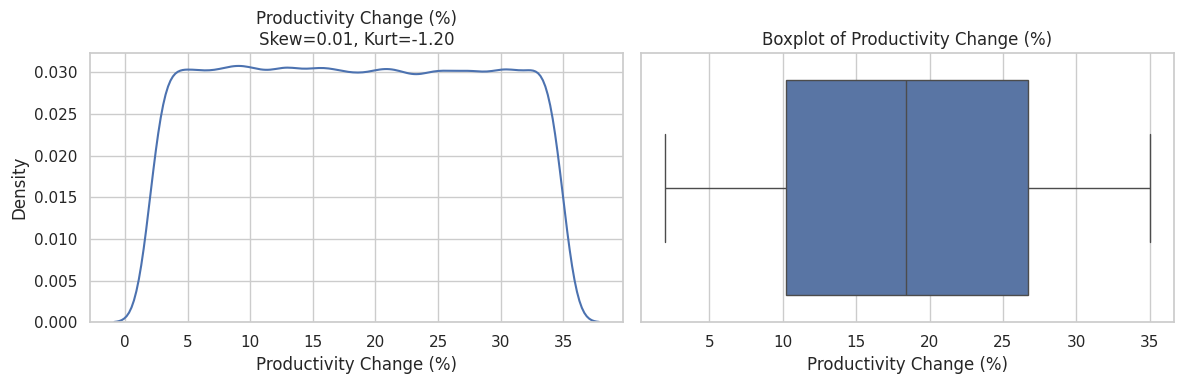

In [ ]:
# =======================
# Univariate Analysis
# =======================
for col in num:
    skewness = df[col].skew()
    kurtosis = df[col].kurt()

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram + KDE
    sns.kdeplot(df[col],ax=axes[0])
    axes[0].set_title(f"{col}\nSkew={skewness:.2f}, Kurt={kurtosis:.2f}")

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()


* Adoption Year: Adoption is evenly spread across 2022–2024 with no skewness, showing balanced recent adoption.

* Number of Employees Impacted: The distribution is closer to uniform (flat) rather than symmetric, meaning companies of all workforce sizes are equally represented.

* New Roles Created: The number of roles (1–30) follows a flat-like distribution, suggesting consistency across companies.

* Training Hours Provided: Training hours (500–25,000) also follow a flat distribution, reflecting varied but balanced training efforts.

* Productivity Change (%): Productivity improvements (2–35%) are fairly uniform across companies, showing consistent benefits from adoption.


* Bivariate Analysis Plan

* Numeric vs Numeric

Correlation heatmap (.corr())

Scatterplots between key pairs (e.g., Training Hours Provided vs Productivity Change (%))

* Categorical vs Numeric

Boxplots and barplots for each categorical vs target (e.g., Industry vs Productivity Change (%))

Grouped means (e.g., avg productivity by country)

* Categorical vs Categorical

Crosstabs (e.g., Industry vs Country, GenAI Tool vs Employee Sentiment)

Countplots/stacked bars to visualize distributions


In [ ]:
df[num].corr()

Number of Employees Impacted  New Roles Created  \
Number of Employees Impacted                      1.000000           0.002799   
New Roles Created                                 0.002799           1.000000   
Training Hours Provided                           0.002466          -0.000183   
Productivity Change (%)                           0.002863           0.003304   

                              Training Hours Provided  Productivity Change (%)  
Number of Employees Impacted                 0.002466                 0.002863  
New Roles Created                           -0.000183                 0.003304  
Training Hours Provided                      1.000000                -0.000350  
Productivity Change (%)                     -0.000350                 1.000000

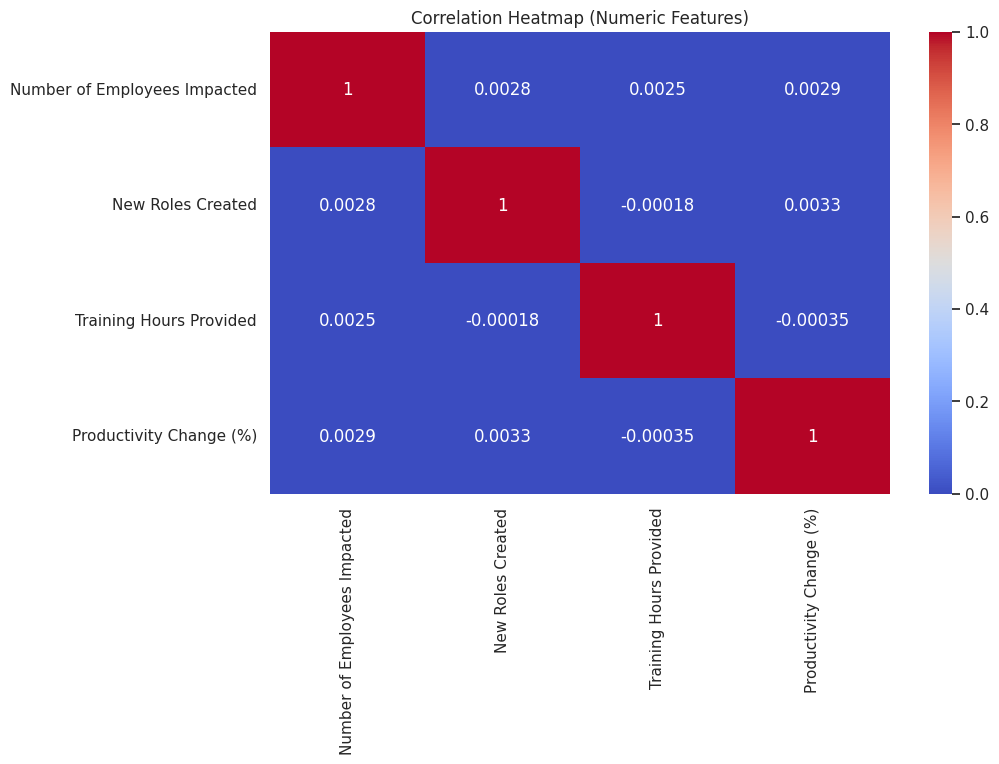

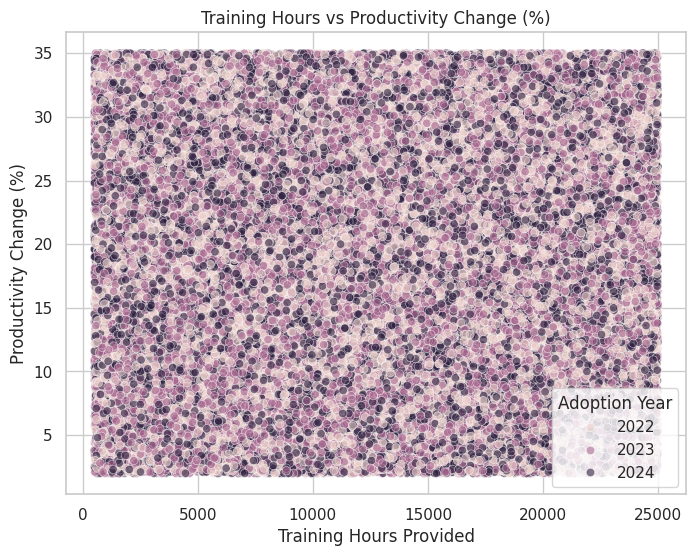

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


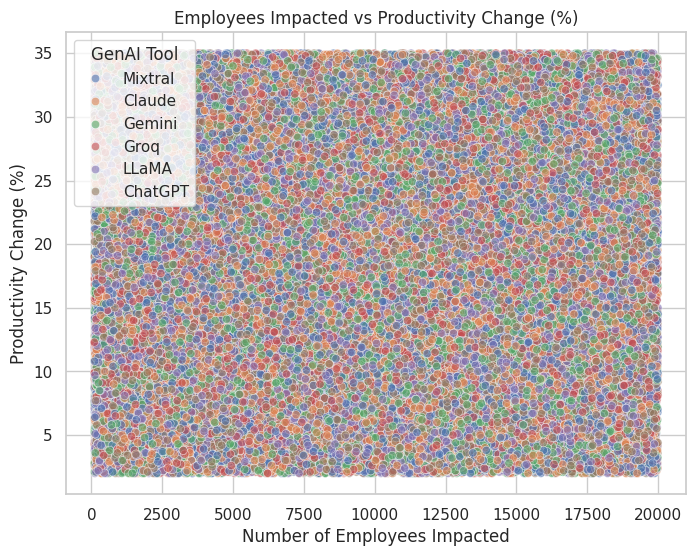

In [ ]:
# ============================
# 1. Numeric vs Numeric
# ============================
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Scatterplot: Training Hours vs Productivity
plt.figure(figsize=(8,6))
sns.scatterplot(x="Training Hours Provided", y="Productivity Change (%)", hue="Adoption Year", data=df, alpha=0.6)
plt.title("Training Hours vs Productivity Change (%)")
plt.show()

# Scatterplot: Employees Impacted vs Productivity
plt.figure(figsize=(8,6))
sns.scatterplot(x="Number of Employees Impacted", y="Productivity Change (%)", hue="GenAI Tool", data=df, alpha=0.6)
plt.title("Employees Impacted vs Productivity Change (%)")
plt.show()


* Inference (Numeric vs Numeric Correlation)

Correlation values are extremely close to 0 (all in the range of -0.005 to +0.003).

This means there is no linear relationship between:

Adoption Year and Productivity

Employees Impacted and Productivity

Training Hours and Productivity

New Roles and Productivity

In other words, numeric predictors do not directly correlate linearly with productivity change.

However — low correlation ≠ no relationship.

There could still be non-linear effects (e.g., threshold effects, diminishing returns).

Also, categorical features (Industry, Country, GenAI Tool, Sentiment) might explain productivity more strongly.

* Takeaway: Linear correlation among numeric variables is negligible → modeling will need categorical drivers and non-linear ML algorithms (not just linear regression).

* Training Hours Provided vs Productivity Change (%)

The scatter is random with no visible trend across all adoption years (2022, 2023, 2024).

Indicates that simply increasing training hours does not linearly translate into productivity improvements.

Possible that quality of training or context (industry, job roles) matters more than raw hours.

* Number of Employees Impacted vs Productivity Change (%)

The scatter is also random and evenly spread across all employee sizes.

Suggests that productivity improvement is independent of company size.

The choice of GenAI Tool or industry-specific factors might drive outcomes more strongly than workforce size.

* Why they don’t move together

A big company (20,000 employees impacted) may still show small % improvement (like +5%) if changes were basic.

A small company (500 employees impacted) may show big % improvement (like +25%) if they used GenAI in a smart way.

Productivity % is about quality of adoption, not number of people affected.

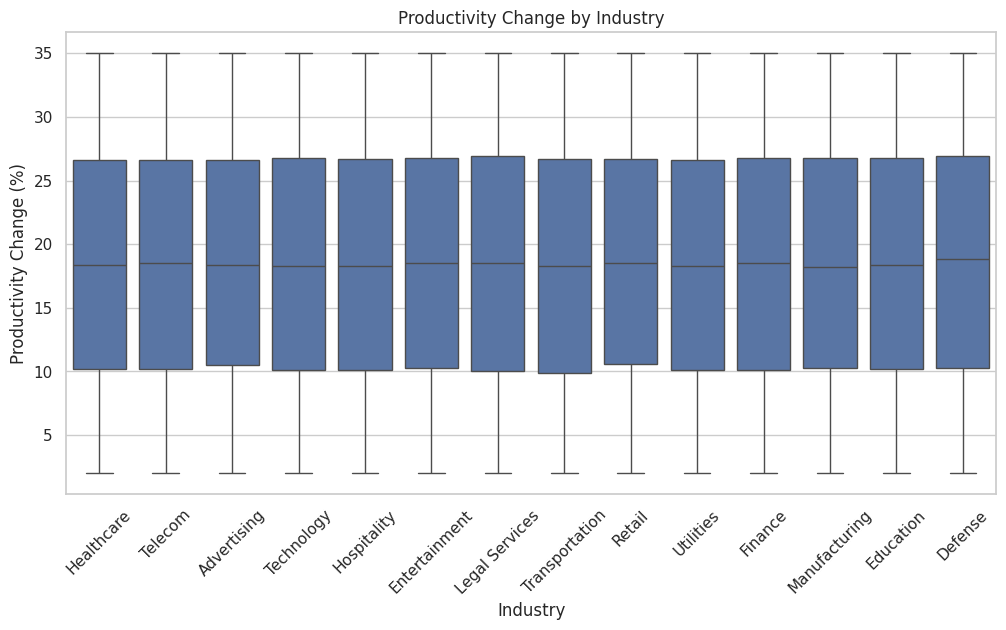

/tmp/ipython-input-2527580385.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Country", y="Productivity Change (%)", data=df, estimator="mean", ci=None)


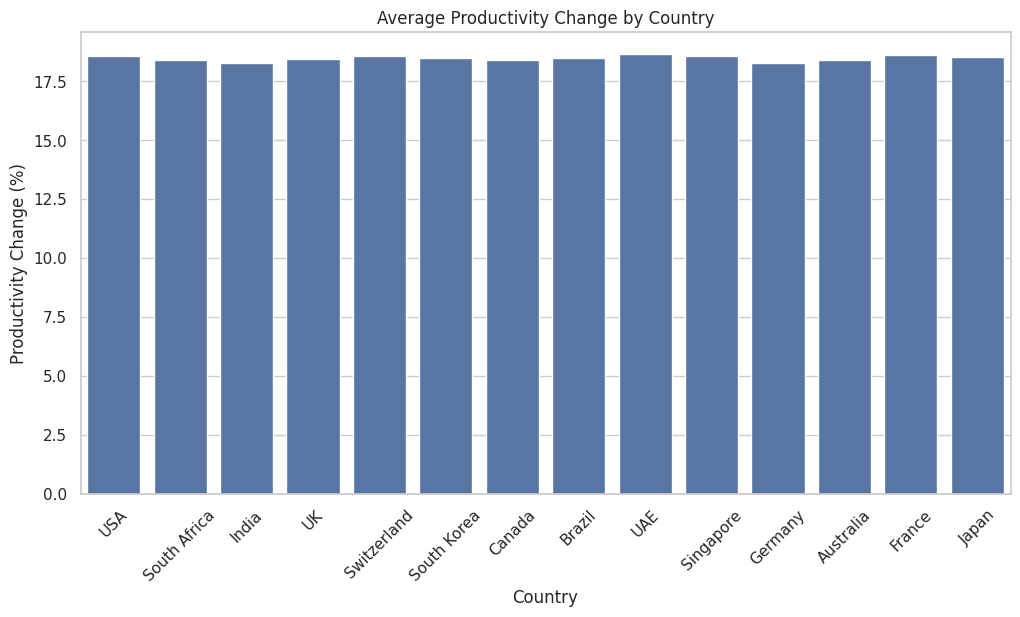

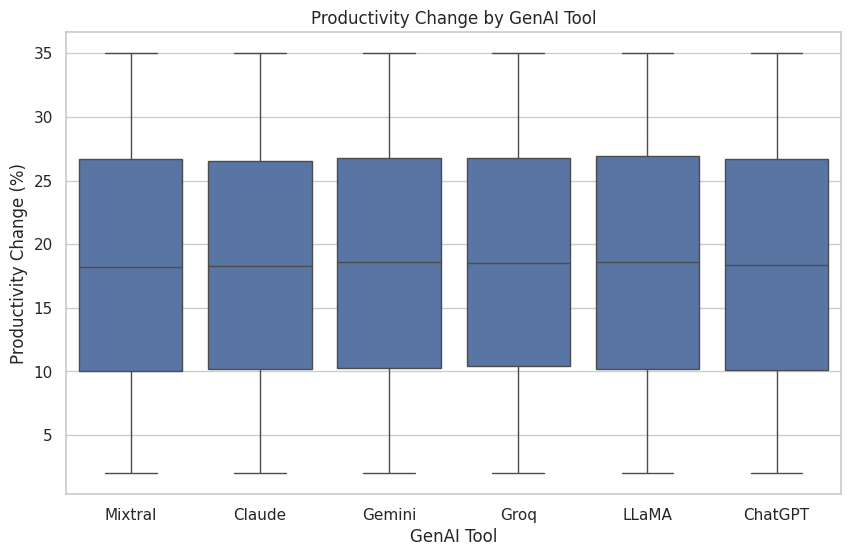

In [ ]:

# ============================
# 2. Categorical vs Numeric
# ============================
# Boxplot: Industry vs Productivity
plt.figure(figsize=(12,6))
sns.boxplot(x="Industry", y="Productivity Change (%)", data=df)
plt.xticks(rotation=45)
plt.title("Productivity Change by Industry")
plt.show()

# Barplot: Country vs Productivity
plt.figure(figsize=(12,6))
sns.barplot(x="Country", y="Productivity Change (%)", data=df, estimator="mean", ci=None)
plt.xticks(rotation=45)
plt.title("Average Productivity Change by Country")
plt.show()

# Boxplot: GenAI Tool vs Productivity
plt.figure(figsize=(10,6))
sns.boxplot(x="GenAI Tool", y="Productivity Change (%)", data=df)
plt.title("Productivity Change by GenAI Tool")
plt.show()

***Inference (Categorical vs Numeric)

* Productivity Change by GenAI Tool

All six tools (Mixtral, Claude, Gemini, Groq, LLaMA, ChatGPT) show very similar productivity distributions.

Median productivity lies around 18–19% for all tools.

No single tool dominates in productivity gains — suggesting that productivity benefits are consistent across tools, possibly driven more by implementation context than the tool itself.

* Average Productivity Change by Country

Across 14 countries, average productivity improvements range from ~18% to ~19%, with minimal variation.

This indicates that geography has little effect on productivity change — adoption benefits appear globally consistent.

* Productivity Change by Industry

All industries show similar distributions, with median productivity again around 18–19%.

The spread is wide in every industry (2% – 35%), meaning within-industry variability is high.

No single industry shows significantly higher or lower productivity improvements. Productivity gains are broad-based across sectors.

* Overall Takeaway

GenAI Tool, Country, and Industry do not create large differences in productivity change.

The gains appear to be universal across tools, countries, and industries, but the variance within each group suggests that company-level factors (e.g., strategy, sentiment, execution) may be more decisive than external factors.

In [ ]:
# Cleaning setup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources (only needed once)
nltk.download('stopwords')
nltk.download('wordnet')

# Cleaning setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)      # remove punctuation & numbers
    tokens = [w for w in text.split() if w and w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens).strip()

# Apply cleaning
df['Cleaned_Sentiment'] = df['Employee Sentiment'].astype(str).apply(clean_text)

# Sentiment polarity (TextBlob)
df['Sentiment Polarity'] = df['Cleaned_Sentiment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 3-class labels with small neutral band (tweak thresholds if desired)
def label_three(score, pos_thresh=0.1, neg_thresh=-0.1):
    if score > pos_thresh:
        return "Positive"
    elif score < neg_thresh:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment Label'] = df['Sentiment Polarity'].apply(lambda s: label_three(s, pos_thresh=0.1, neg_thresh=-0.1))

# Binary label (Positive if polarity>0 else Negative)
df['Sentiment Label Binary'] = df['Sentiment Polarity'].apply(lambda s: "Positive" if s > 0 else "Negative")

# TF-IDF features for future ML
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['Cleaned_Sentiment'].fillna(""))

# Quick check output
print("Three-class counts:\n", df['Sentiment Label'].value_counts(dropna=False))
print("\nBinary counts:\n", df['Sentiment Label Binary'].value_counts(dropna=False))
print("\nSample rows:")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Three-class counts:
 Sentiment Label
Neutral     54149
Positive    23027
Negative    22824
Name: count, dtype: int64

Binary counts:
 Sentiment Label Binary
Negative    57990
Positive    42010
Name: count, dtype: int64

Sample rows:


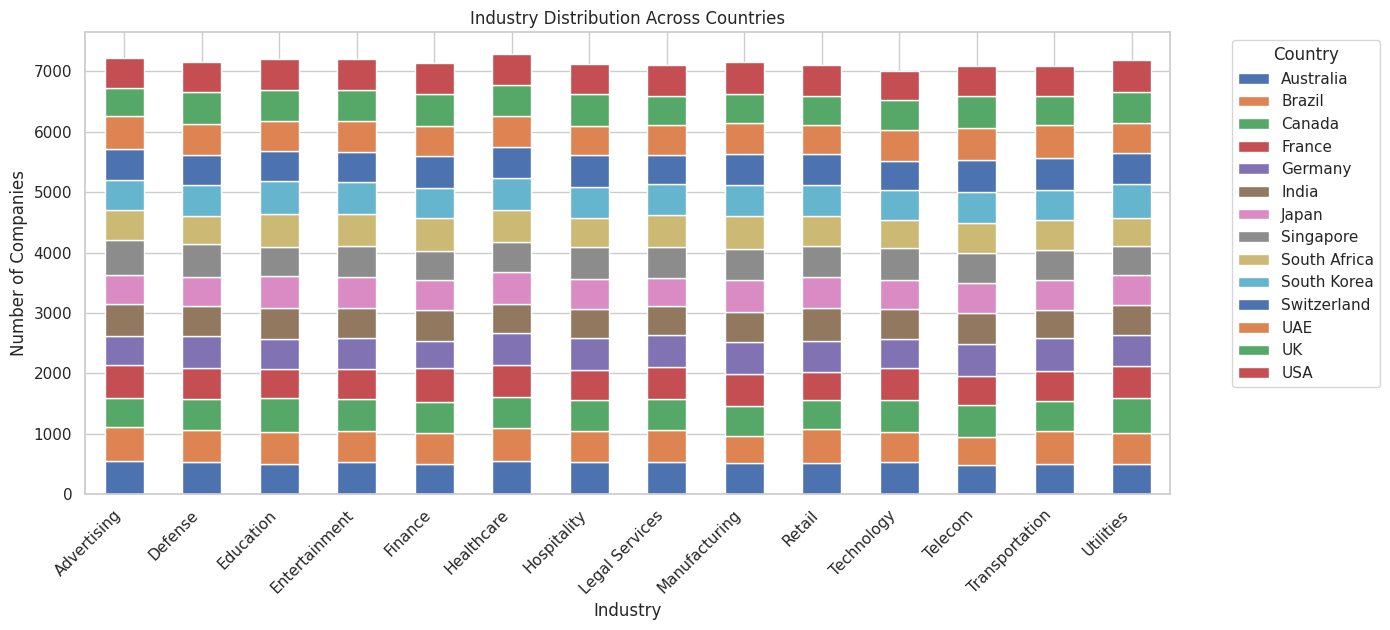

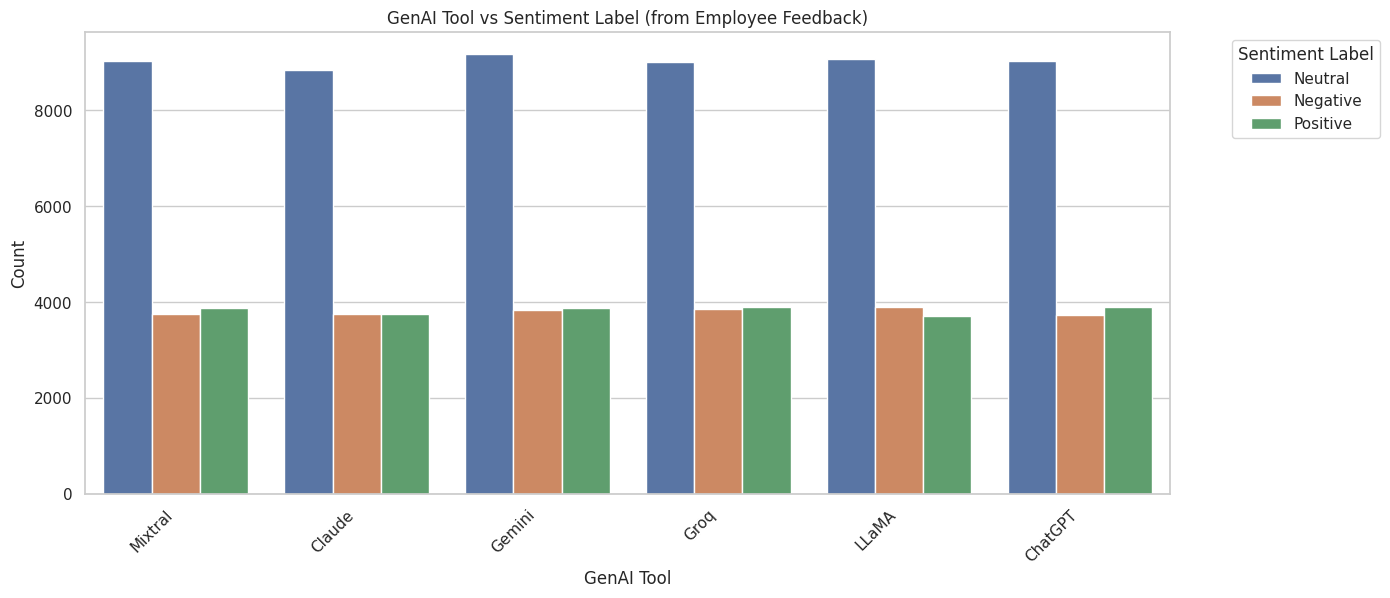

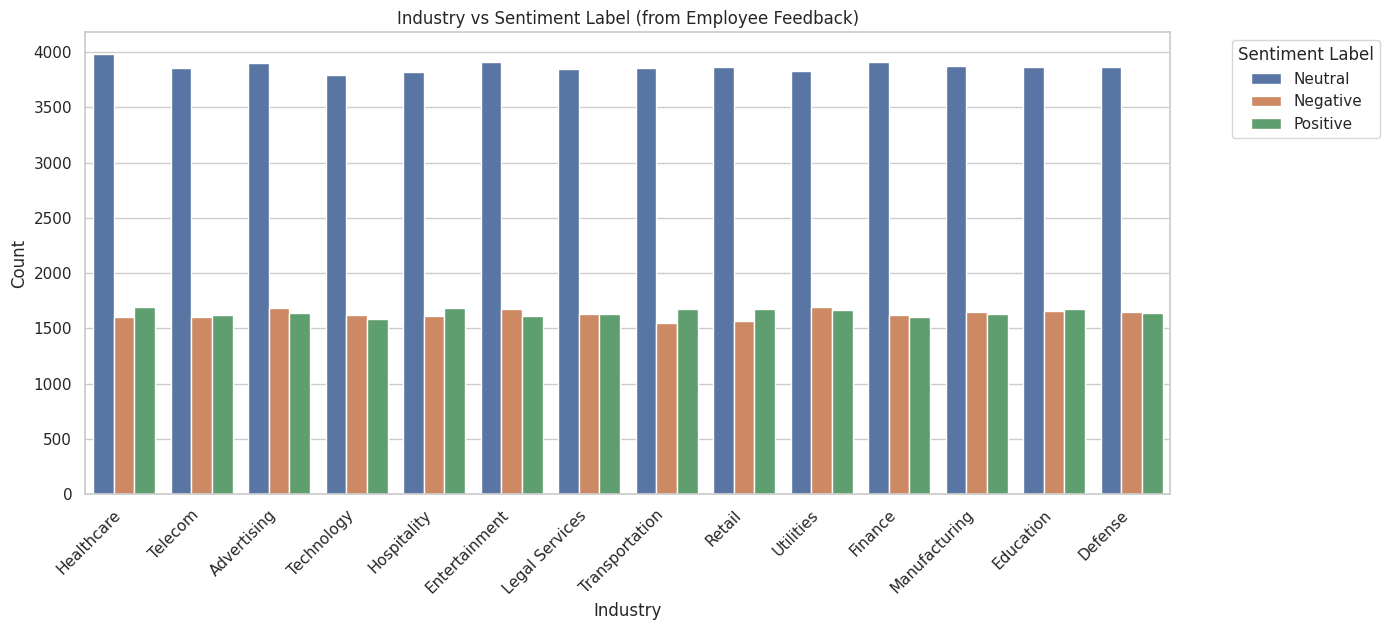

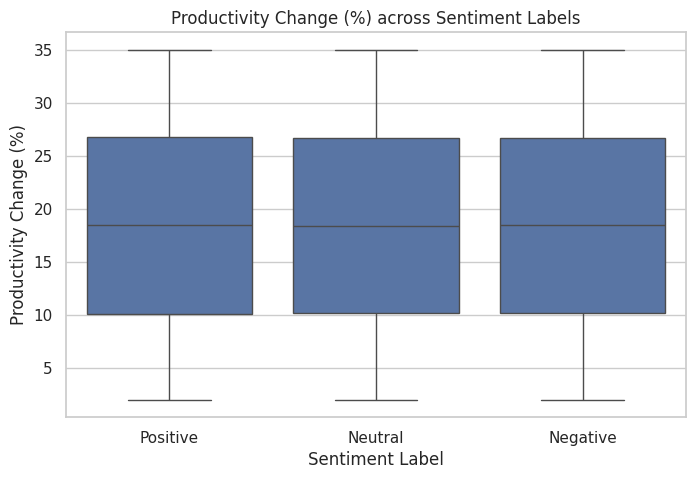

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ============================
# 1. Industry vs Country (Stacked Barplot)
# Context variable-to-variable check
# ============================
crosstab_ic = pd.crosstab(df['Industry'], df['Country'])
crosstab_ic.plot(kind="bar", stacked=True, figsize=(14,6))
plt.title("Industry Distribution Across Countries")
plt.ylabel("Number of Companies")
plt.xlabel("Industry")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# ============================
# 2. GenAI Tool vs Sentiment Label
# Uses new categorical sentiment labels
# ============================
plt.figure(figsize=(14,6))
sns.countplot(x="GenAI Tool", hue="Sentiment Label", data=df)
plt.title("GenAI Tool vs Sentiment Label (from Employee Feedback)")
plt.xlabel("GenAI Tool")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sentiment Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# ============================
# 3. Industry vs Sentiment Label
# Which industries have more Positive/Neutral/Negative employees
# ============================
plt.figure(figsize=(14,6))
sns.countplot(x="Industry", hue="Sentiment Label", data=df)
plt.title("Industry vs Sentiment Label (from Employee Feedback)")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sentiment Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# ============================
# 4. Sentiment Label vs Productivity Change (%)
# Direct numeric analysis using Productivity vs Sentiment
# ============================
plt.figure(figsize=(8,5))
sns.boxplot(x="Sentiment Label", y="Productivity Change (%)", data=df,
            order=['Positive','Neutral','Negative'])
plt.title("Productivity Change (%) across Sentiment Labels")
plt.xlabel("Sentiment Label")
plt.ylabel("Productivity Change (%)")
plt.show()


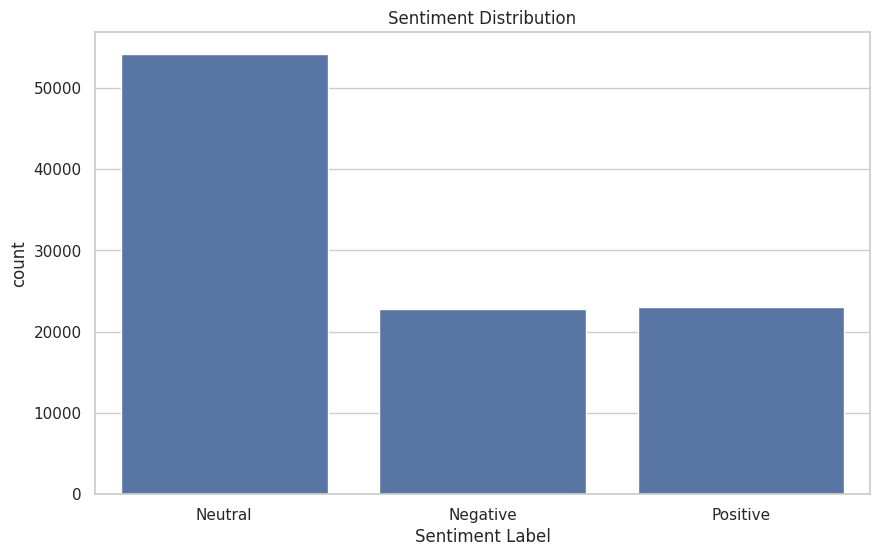

In [ ]:
sns.countplot(x='Sentiment Label', data=df)
plt.title('Sentiment Distribution')
plt.show()

** Inferences from the 4 plots **

* Industry vs Country (stacked bar)

Every industry has representation across multiple countries.

Adoption patterns are driven more by countries than industries.

Countries like USA, UK, India dominate across industries.

* GenAI Tool vs Sentiment Label

Across all tools, Neutral sentiment dominates.

Positive and Negative are almost balanced, with no tool showing extreme bias.

This suggests that employees are still in a learning/adoption phase for these tools.

* Industry vs Sentiment Label

In every industry, Neutral sentiment is the majority.

Positive and Negative proportions are fairly even across sectors.

No industry has a strongly different sentiment pattern, meaning employee opinions are consistent across industries.

* Sentiment Label vs Productivity Change (%)

The medians of Productivity % for Positive, Neutral, and Negative are almost identical.

Spread and distribution are also similar across groups.

Inference: Employee sentiment alone does not significantly impact productivity change — other factors (industry, country, tool) likely explain more.

In [ ]:
df

Industry       Country GenAI Tool Adoption Year  \
0          Healthcare           USA    Mixtral          2022   
1             Telecom  South Africa     Claude          2023   
2         Advertising         India     Gemini          2023   
3          Technology            UK       Groq          2023   
4         Hospitality            UK      LLaMA          2024   
...               ...           ...        ...           ...   
99995   Entertainment        Canada    Mixtral          2022   
99996     Advertising   South Korea    Mixtral          2023   
99997  Legal Services         Japan       Groq          2024   
99998     Hospitality   Switzerland       Groq          2022   
99999      Healthcare         India    ChatGPT          2023   

       Number of Employees Impacted  New Roles Created  \
0                              5277                  8   
1                             18762                 17   
2                             11307                 17   
3                             18834                 12   
4                              8364                 22   
...                             ...                ...   
99995                         17981                 18   
99996                          3596                 10   
99997                         17782                 10   
99998                          6248                  9   
99999                         19193                 11   

       Training Hours Provided  Productivity Change (%)  \
0                          657                     25.2   
1                        23021                     27.5   
2                         4680                     11.5   
3                         1750                      7.0   
4                         3925                      2.5   
...                        ...                      ...   
99995                    14627                      7.9   
99996                    19227                     25.7   
99997                    23207                     10.2   
99998                    14477                     21.4   
99999                     2631                      8.4   

                                      Employee Sentiment  \
0      Productivity increased, but there's anxiety ab...   
1      We now finish tasks faster, but some older emp...   
2      Productivity increased, but there's anxiety ab...   
3      AI helped me reduce repetitive tasks, but lear...   
4      Job roles have shifted a lot, which is both go...   
...                                                  ...   
99995  AI helped me reduce repetitive tasks, but lear...   
99996  Collaboration improved; documentation and meet...   
99997  Our workflows have improved drastically with g...   
99998  We now finish tasks faster, but some older emp...   
99999  AI helped me reduce repetitive tasks, but lear...   

                                       Cleaned_Sentiment  Sentiment Polarity  \
0      productivity increased anxiety job security jo...            0.000000   
1      finish task faster older employee struggling c...            0.020833   
2      productivity increased anxiety job security ch...            0.000000   
3      ai helped reduce repetitive task learning curv...           -0.125000   
4      job role shifted lot good scary client expect ...            0.025000   
...                                                  ...                 ...   
99995  ai helped reduce repetitive task learning curv...           -0.250000   
99996  collaboration improved documentation meeting e...            0.000000   
99997  workflow improved drastically generative ai jo...            0.000000   
99998  finish task faster older employee struggling c...            0.020833   
99999  ai helped reduce repetitive task learning curv...           -0.375000   

      Sentiment Label Sentiment Label Binary  
0             Neutral               Negative  
1             Neutral               Positive  
2             N

In [ ]:
## Step 10: Bivariate Analysis

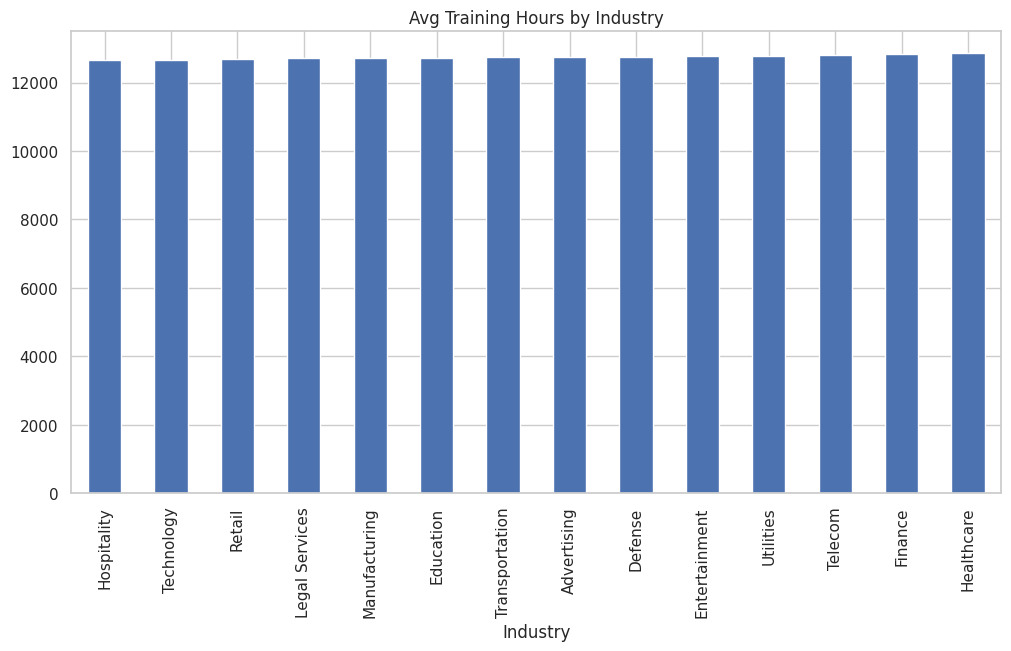

In [ ]:

# Industry vs Training Hours
industry_hours = df.groupby("Industry")["Training Hours Provided"].mean().sort_values()
industry_hours.plot(kind='bar', figsize=(12,6), title="Avg Training Hours by Industry")
plt.xticks(rotation=90)
plt.show()


* Inference:
All industries provide almost the same average training (~12.6K hrs). Minor differences exist (Healthcare slightly higher, Hospitality lower), but overall training effort is consistent across sectors.

In [ ]:

# Top 5 countries with highest productivity change
top_countries = df.groupby("Country")["Productivity Change (%)"].mean().sort_values(ascending=False).head(5)
top_countries


Country
UAE            18.654562
France         18.627089
USA            18.585816
Switzerland    18.553126
Singapore      18.549986
Name: Productivity Change (%), dtype: float64

* Inference:
The top 5 countries with the highest average productivity change are UAE, France, USA, Switzerland, and Singapore (all ~18.5–18.7%).3rxcv

➡️ The differences are very small (<0.2%), showing productivity gains are consistent globally, regardless of country.

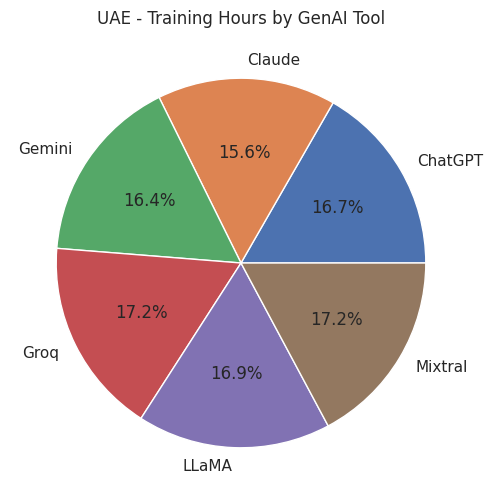

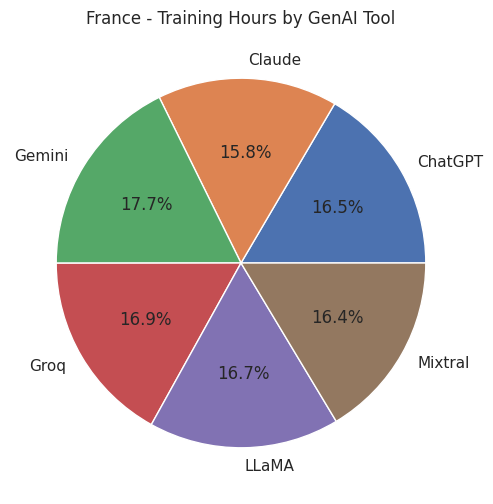

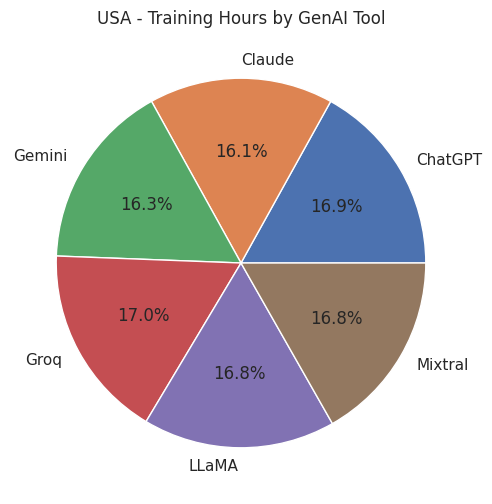

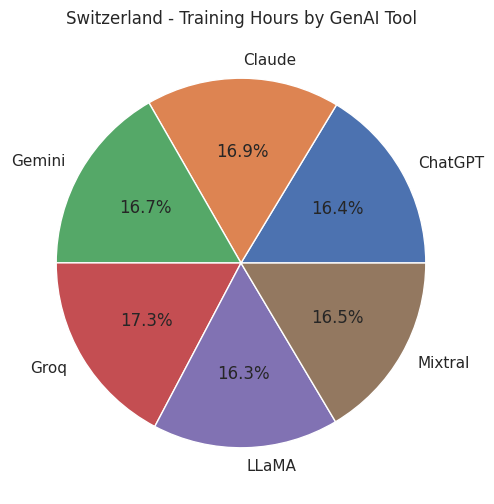

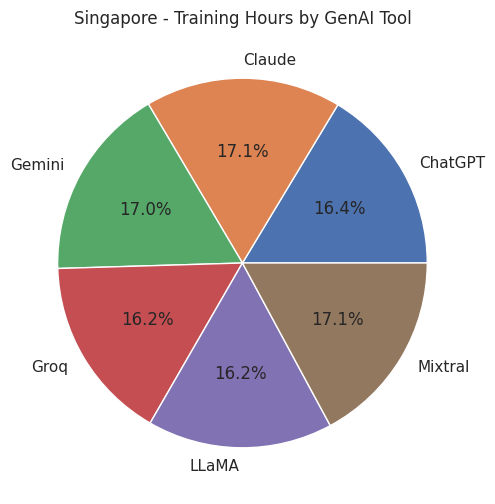

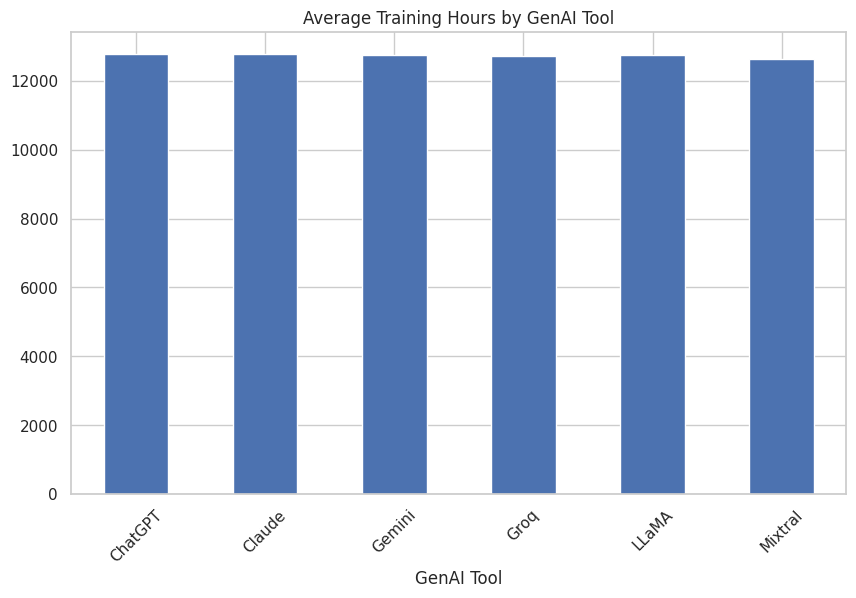

In [ ]:

# Pie charts of training hours by tool in top 5 countries
for country in top_countries.index:
    tool_hours = df[df["Country"]==country].groupby("GenAI Tool")["Training Hours Provided"].sum()
    tool_hours.plot(kind="pie", autopct='%1.1f%%', title=f"{country} - Training Hours by GenAI Tool")
    plt.ylabel("")
    plt.show()

df.groupby("GenAI Tool")["Training Hours Provided"].mean().plot(kind="bar", title="Average Training Hours by GenAI Tool")
plt.xticks(rotation=45)
plt.show()


* Inference:

Training hours by GenAI tool (bar chart):
All six tools receive almost the same average training hours (~12.6K), showing balanced organizational investment across tools.

Pie charts (top 5 countries):

The distribution of training hours among tools is very uniform in each country.

No tool dominates significantly; shares range between ~15%–18%.

Small differences exist (e.g., Gemini slightly higher in France, Groq higher in UAE/Switzerland), but overall, training allocation is evenly spread.

➡️ Takeaway: Companies maintain a balanced training approach across GenAI tools and countries, suggesting that productivity outcomes are not tool-specific but more influenced by how tools are implemented.

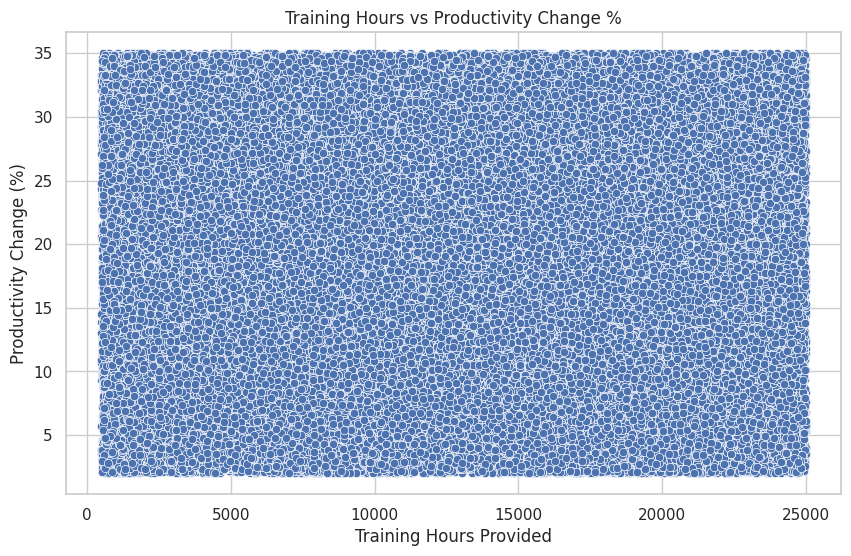

In [ ]:

# Training hours vs productivity change %
sns.scatterplot(x="Training Hours Provided", y="Productivity Change (%)", data=df)
plt.title("Training Hours vs Productivity Change %")
plt.show()


* Inference:
The scatterplot shows no clear trend or correlation between training hours and productivity change.

➡️ Companies with both low (500 hrs) and high (25,000 hrs) training hours achieved anywhere between 2% to 35% productivity gains.

👉 This suggests that training quantity alone doesn’t drive productivity — other factors (quality of training, tool adoption strategy, employee sentiment) likely play a bigger role.

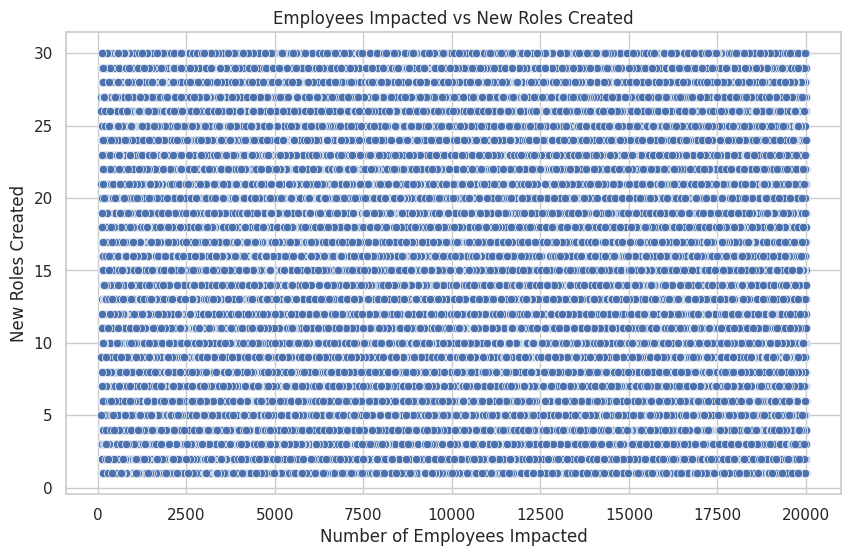

In [ ]:

# Employees impacted vs new roles created
sns.scatterplot(x="Number of Employees Impacted", y="New Roles Created", data=df)
plt.title("Employees Impacted vs New Roles Created")
plt.show()


* Inference:
The scatterplot shows no strong linear relationship between the number of employees impacted and the number of new roles created.

Companies impacting small or large numbers of employees still tend to create anywhere between 1 to 30 new roles.

The new roles appear evenly distributed regardless of company size.

👉 This suggests that role creation depends more on organizational strategy and adoption needs rather than just workforce size.

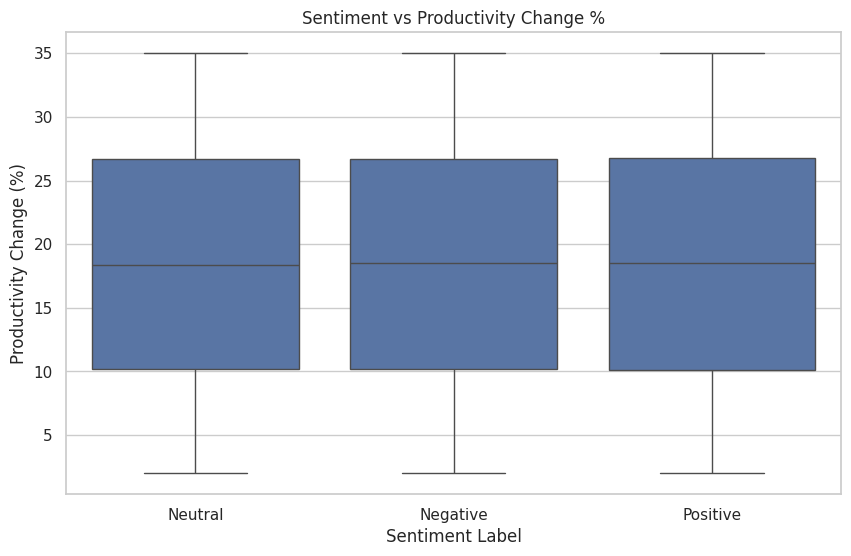

In [ ]:
# Sentiment vs Productivity Change
sns.boxplot(x="Sentiment Label", y="Productivity Change (%)", data=df)
plt.title("Sentiment vs Productivity Change %")
plt.show()


* Inference:
The boxplot shows that productivity change (%) is nearly identical across Positive, Neutral, and Negative sentiment groups.

Median productivity is around 18–19% for all three sentiment categories.

The spread (2%–35%) is also similar across groups.

No sentiment type clearly outperforms others in driving productivity gains.

👉 Conclusion: Employee sentiment (positive, neutral, or negative) does not have a strong influence on actual productivity change — suggesting that other organizational or structural factors are more decisive.

## Step 10: Multivariate Analysis

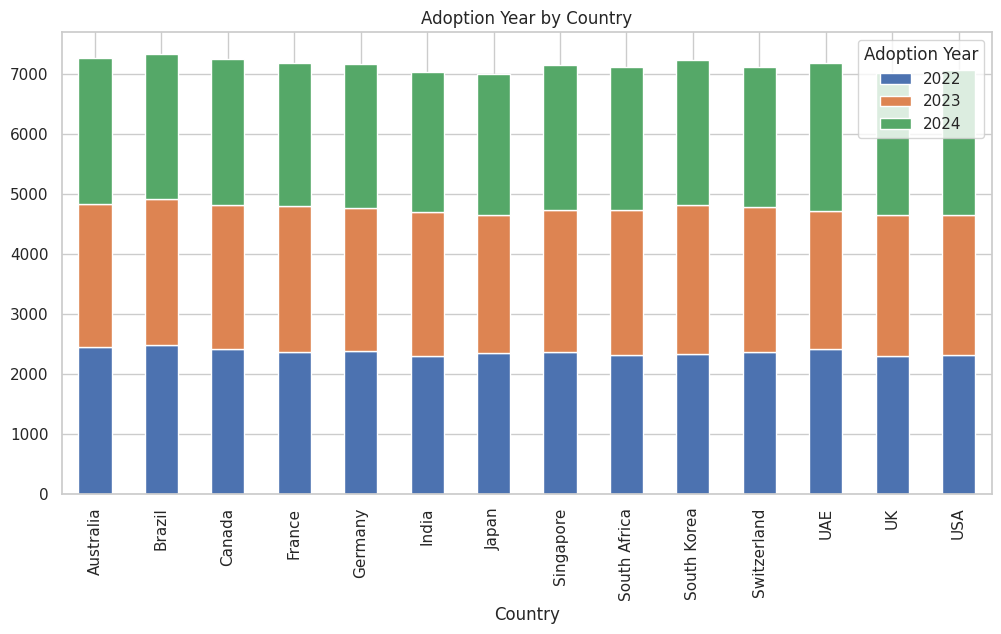

In [ ]:

# Adoption year by country (stacked bar)
adoption = df.groupby(["Country","Adoption Year"]).size().unstack()
adoption.plot(kind="bar", stacked=True, figsize=(12,6), title="Adoption Year by Country")
plt.show()


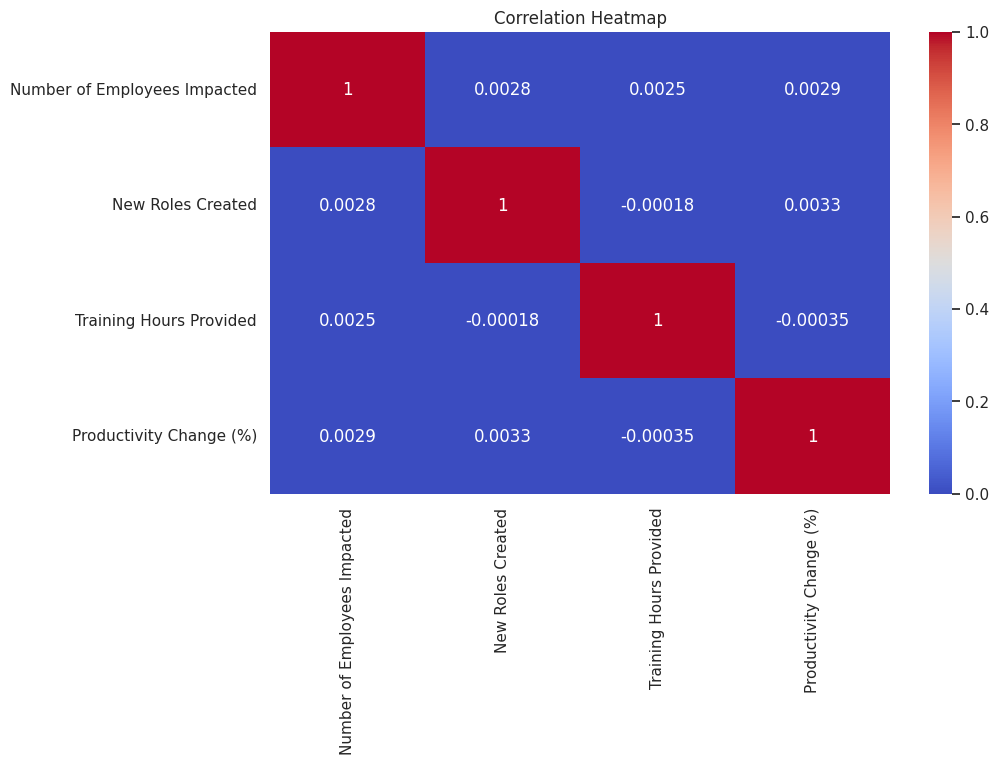

In [ ]:

# Heatmap (numeric only, excluding Adoption Year)
plt.figure(figsize=(10,6))
sns.heatmap(df[num].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


📊 Adoption Year by Country (Stacked Bar)

Adoption of GenAI tools is well distributed across 2022, 2023, and 2024 in all countries.

No country is lagging — every country shows a balanced distribution of adoption years.

Slight variations exist, but overall adoption seems to be uniform and synchronized globally, which means companies across the world are embracing GenAI at nearly the same pace.

🔥 Correlation Heatmap (Numeric Features)

Correlation values between all numeric features are extremely close to 0 (between -0.0003 and 0.003).

This indicates:

Number of Employees Impacted does not strongly influence productivity change.

New Roles Created has almost no correlation with productivity change.

Training Hours Provided also shows no direct correlation with productivity change.

✅ Key Insight: Productivity gains are not linearly explained by numeric features (employees, training, roles).
Instead, categorical/contextual factors (like industry, tool, employee sentiment) may play a bigger role.

👉 Overall takeaway:

Adoption trends are globally consistent, meaning no country is significantly ahead or behind.

Productivity improvements are not explained by simple numeric metrics — qualitative factors (like adoption strategy, employee sentiment, and industry practices) are more likely to drive differences.

## Step 11: WordClouds for Sentiment

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(lbl):
    text = " ".join(df[df['Sentiment Label']==lbl]['Employee Sentiment'].astype(str).values)
    if not text.strip():
        print(f"No text for {lbl}")
        return
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud — {lbl}")
    plt.show()

for lbl in ['Positive','Neutral','Negative']:
    plot_wordcloud(lbl)


* Positive WordCloud

Frequent words: “love”, “using”, “AI”, “makes”, “easier”, “excited”.

Employees highlight enthusiasm and improved ease of work.

Sentiment reflects strong acceptance of GenAI tools with optimism about smoother workflows and faster task completion.

* Neutral WordCloud

Frequent words: “shift”, “AI”, “job roles”, “meetings”, “lot”.

Neutral tone shows employees describing changes in roles and workflows without clear positive or negative judgment.

Words like “big shift” and “adapted” suggest transition phase and adjustment rather than clear satisfaction or dissatisfaction.

* Negative WordCloud

Frequent words: “learning curve”, “repetitive tasks”, “skeptical”, “concern”, “left behind”.

Negative sentiment reflects fear, anxiety, and adaptation challenges, especially with the steep learning curve and job security concerns.

Despite some mentions of “AI helped”, skepticism dominates.

**Overall Insight:**

Positive group emphasizes excitement and benefits.

Neutral group focuses on the transformation process.

Negative group stresses challenges and anxieties.

This shows that while GenAI adoption generally creates optimism, concerns about learning curves and job security remain barriers.

## Step 12: Hypothesis Testing

In [ ]:
from scipy import stats

In [ ]:

# Chi-square: GenAI tool vs Industry

# * Null Hypothesis (H₀):
# There is no association between the type of GenAI tool adopted and the industry (they are independent).

# * Alternative Hypothesis (H₁):
# There is an association between the type of GenAI tool adopted and the industry (they are not independent).

cont_table = pd.crosstab(df["GenAI Tool"], df["Industry"])
chi2, p, dof, ex = stats.chi2_contingency(cont_table)
print("Chi-Square Test (Tool vs Industry): chi2=", chi2, "p-value=", p)


* Test Result:

Chi² = 50.64

p-value = 0.904

* Inference:
Since p-value (0.904) >> 0.05, we fail to reject H₀.

* Conclusion:
👉 The choice of GenAI tool is independent of industry.
This means industries do not show a strong preference for specific tools — adoption is spread fairly evenly across all sectors.

In [ ]:
# Chi-Square Test: Sentiment (3-class) vs Industry

# Null Hypothesis (H₀):
# Employee sentiment (Positive / Neutral / Negative) is independent of industry.

# Alternative Hypothesis (H₁):
# Employee sentiment (Positive / Neutral / Negative) is associated with industry.

from scipy.stats import chi2_contingency
import pandas as pd


ct = pd.crosstab(df['Industry'], df['Sentiment Label'])
chi2, p, dof, expected = chi2_contingency(ct, correction=False)
print("Chi2 =", round(chi2,3), " p-value =", p)



* Test Result (your output):

Chi² = 20.131

p-value = 0.7853

* Inference:
Since p-value = 0.7853 > 0.05, we fail to reject H₀.
👉 This means sentiment distribution is not significantly different across industries.

* Conclusion (general):
Employee sentiment appears to be consistent across industries, with no strong statistical evidence that some industries are significantly more positive or negative than others.

In [ ]:

# ANOVA: Productivity across countries

# * Null Hypothesis (H₀):
# The mean productivity change (%) is the same across all countries.

# * Alternative Hypothesis (H₁):
# At least one country’s mean productivity change (%) is different from the others.

from scipy import stats

groups = [df[df["Country"]==c]["Productivity Change (%)"] for c in df["Country"].unique()]
anova = stats.f_oneway(*groups)
print("F-statistic =", round(anova.statistic, 3), " p-value =", anova.pvalue)



* Test Result (your output):

F-statistic = 1.225
p-value = 0.2534

* Inference:

Since p-value = 0.2534 > 0.05, we fail to reject H₀.
👉 This means there is no significant difference in mean productivity change (%) across countries.

* Conclusion (general):

Productivity improvements after GenAI adoption appear consistent across countries. There is no strong statistical evidence that companies in some countries experience higher or lower productivity gains than others.

In [ ]:

# Pearson correlation: Training hours vs Productivity Change

# * Null Hypothesis (H₀):

# There is no linear correlation between Training Hours Provided and Productivity Change (%).

# * Alternative Hypothesis (H₁):

# There is a linear correlation between Training Hours Provided and Productivity Change (%)


pearson_corr, p_val = stats.pearsonr(df["Training Hours Provided"], df["Productivity Change (%)"])
pearson_corr, p_val


* Test Result (your output):

Pearson correlation coefficient (r) = -0.00035

p-value = 0.9119

* Inference:

Since p-value = 0.9119 > 0.05, we fail to reject H₀.

The correlation coefficient is nearly zero (≈ -0.00035), meaning there is no linear relationship.

Training hours have no measurable effect on productivity change.

* Conclusion (general):

👉 Training efforts (measured in hours) do not directly correlate with productivity improvements.
This suggests that quality and relevance of training, not just quantity (hours), likely matter more for productivity impact.

## Step 13: Building the Model


#### BELOW SETUP IS ALREADY DONE IN PREVIOUS CELLS.
#### so, we have just written again for reference

In [ ]:
# # Cleaning setup
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from textblob import TextBlob
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Download NLTK resources (only needed once)
# nltk.download('stopwords')
# nltk.download('wordnet')

# # Cleaning setup
# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer()

# def clean_text(text):
#     text = str(text).lower()
#     text = re.sub(r'[^a-z\s]', ' ', text)      # remove punctuation & numbers
#     tokens = [w for w in text.split() if w and w not in stop_words]
#     tokens = [lemmatizer.lemmatize(w) for w in tokens]
#     return " ".join(tokens).strip()

# # Apply cleaning
# df['Cleaned_Sentiment'] = df['Employee Sentiment'].astype(str).apply(clean_text)

# # Sentiment polarity (TextBlob)
# df['Sentiment Polarity'] = df['Cleaned_Sentiment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# # 3-class labels with small neutral band (tweak thresholds if desired)
# def label_three(score, pos_thresh=0.1, neg_thresh=-0.1):
#     if score > pos_thresh:
#         return "Positive"
#     elif score < neg_thresh:
#         return "Negative"
#     else:
#         return "Neutral"

# df['Sentiment Label'] = df['Sentiment Polarity'].apply(lambda s: label_three(s, pos_thresh=0.1, neg_thresh=-0.1))

# # Binary label (Positive if polarity>0 else Negative)
# df['Sentiment Label Binary'] = df['Sentiment Polarity'].apply(lambda s: "Positive" if s > 0 else "Negative")

# # TF-IDF features for future ML
# tfidf = TfidfVectorizer(max_features=5000)
# X_tfidf = tfidf.fit_transform(df['Cleaned_Sentiment'].fillna(""))

# # Quick check output
# print("Three-class counts:\n", df['Sentiment Label'].value_counts(dropna=False))
# print("\nBinary counts:\n", df['Sentiment Label Binary'].value_counts(dropna=False))
# print("\nSample rows:")

In [ ]:
# Cell 1: Modeling imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score


In [ ]:
df

Industry       Country GenAI Tool Adoption Year  \
0          Healthcare           USA    Mixtral          2022   
1             Telecom  South Africa     Claude          2023   
2         Advertising         India     Gemini          2023   
3          Technology            UK       Groq          2023   
4         Hospitality            UK      LLaMA          2024   
...               ...           ...        ...           ...   
99995   Entertainment        Canada    Mixtral          2022   
99996     Advertising   South Korea    Mixtral          2023   
99997  Legal Services         Japan       Groq          2024   
99998     Hospitality   Switzerland       Groq          2022   
99999      Healthcare         India    ChatGPT          2023   

       Number of Employees Impacted  New Roles Created  \
0                              5277                  8   
1                             18762                 17   
2                             11307                 17   
3                             18834                 12   
4                              8364                 22   
...                             ...                ...   
99995                         17981                 18   
99996                          3596                 10   
99997                         17782                 10   
99998                          6248                  9   
99999                         19193                 11   

       Training Hours Provided  Productivity Change (%)  \
0                          657                     25.2   
1                        23021                     27.5   
2                         4680                     11.5   
3                         1750                      7.0   
4                         3925                      2.5   
...                        ...                      ...   
99995                    14627                      7.9   
99996                    19227                     25.7   
99997                    23207                     10.2   
99998                    14477                     21.4   
99999                     2631                      8.4   

                                      Employee Sentiment  \
0      Productivity increased, but there's anxiety ab...   
1      We now finish tasks faster, but some older emp...   
2      Productivity increased, but there's anxiety ab...   
3      AI helped me reduce repetitive tasks, but lear...   
4      Job roles have shifted a lot, which is both go...   
...                                                  ...   
99995  AI helped me reduce repetitive tasks, but lear...   
99996  Collaboration improved; documentation and meet...   
99997  Our workflows have improved drastically with g...   
99998  We now finish tasks faster, but some older emp...   
99999  AI helped me reduce repetitive tasks, but lear...   

              Industry__Country  
0               Healthcare__USA  
1         Telecom__South Africa  
2            Advertising__India  
3                Technology__UK  
4               Hospitality__UK  
...                         ...  
99995     Entertainment__Canada  
99996  Advertising__South Korea  
99997     Legal Services__Japan  
99998  Hospitality__Switzerland  
99999         Healthcare__India  

[100000 rows x 10 columns]

## BASELINE(DUMMY REGRESSOR) AND LINEAR REGRESSOR

In [ ]:
# ===========================
# 1. Imports
# ===========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# 2. Load dataset
# ===========================
df = pd.read_csv("/content/Enterprise_GenAI_Adoption_Impact.csv")

# Clean numeric target
df['Productivity Change (%)'] = pd.to_numeric(
    df['Productivity Change (%)'].astype(str).str.replace('%','', regex=False).str.strip(),
    errors='coerce'
).fillna(0)

# ===========================
# 3. Prepare features for regression
# ===========================
numeric_features = ['Number of Employees Impacted', 'New Roles Created', 'Training Hours Provided']
categorical_features = ['Industry', 'Country', 'GenAI Tool', 'Adoption Year']
df[categorical_features] = df[categorical_features].astype(str).fillna("Missing")

X_reg = pd.get_dummies(df[numeric_features + categorical_features], drop_first=True)
y_reg = df['Productivity Change (%)']

# ===========================
# 4. Train-test split
# ===========================
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# ===========================
# 5. Scale numeric features
# ===========================
scaler = StandardScaler()
X_train_reg[numeric_features] = scaler.fit_transform(X_train_reg[numeric_features])
X_test_reg[numeric_features] = scaler.transform(X_test_reg[numeric_features])

# ===========================
# 6. Baseline and Linear Regression
# ===========================
# Dummy Regressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train_reg, y_train_reg)
y_train_dummy = dummy.predict(X_train_reg)
y_test_dummy = dummy.predict(X_test_reg)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_train_lr = lr.predict(X_train_reg)
y_test_lr = lr.predict(X_test_reg)

# ===========================
# 7. Metrics function for train and test
# ===========================
def reg_metrics_train_test(y_train_true, y_train_pred, y_test_true, y_test_pred, name="Model"):
    # Train metrics
    mae_train = mean_absolute_error(y_train_true, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
    r2_train = r2_score(y_train_true, y_train_pred)

    # Test metrics
    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    r2_test = r2_score(y_test_true, y_test_pred)

    print(f"{name} Metrics:")
    print(f"  Training -> MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, R2: {r2_train:.4f}")
    print(f"  Testing  -> MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, R2: {r2_test:.4f}")
    print("-"*50)

# ===========================
# 8. Print metrics
# ===========================
reg_metrics_train_test(y_train_reg, y_train_dummy, y_test_reg, y_test_dummy, "DummyRegressor (mean)")
reg_metrics_train_test(y_train_reg, y_train_lr, y_test_reg, y_test_lr, "LinearRegression")


DummyRegressor (mean) Metrics:
  Training -> MAE: 8.2528, RMSE: 9.5262, R2: 0.0000
  Testing  -> MAE: 8.2588, RMSE: 9.5327, R2: -0.0000
--------------------------------------------------
LinearRegression Metrics:
  Training -> MAE: 8.2498, RMSE: 9.5231, R2: 0.0006
  Testing  -> MAE: 8.2613, RMSE: 9.5372, R2: -0.0010
--------------------------------------------------


## **Test Results**

## ***Inference***

## Dummy Regressor (mean)

The model predicts the mean productivity change for all samples.

Training and testing metrics show MAE ≈ 8.25, RMSE ≈ 9.53, and R² ≈ 0, which is expected for a naive baseline.

This establishes a reference point: any real model should perform better than this baseline.

## Linear Regression

Training MAE and RMSE are slightly better than the dummy, with R² ≈ 0.0006, indicating minimal fit on training data.

Testing metrics are almost identical to the dummy, with R² ≈ -0.001, meaning the model performs slightly worse than predicting the mean.

This suggests no strong linear relationship exists between the input features and productivity change in the dataset.

Conclusion

Linear regression is unable to capture the underlying patterns in the data.

More complex, non-linear models such as RandomForestRegressor or GradientBoostingRegressor are likely required to explain the variation and improve prediction accuracy.

Linear Regression performs no better — its error metrics (MAE, RMSE) are almost identical to the dummy, and R² is slightly negative (which means it is worse than predicting the mean).

This shows no strong linear relationship between predictors and productivity change.

Linear models cannot capture the structure in your data → non-linear models (like RandomForestRegressor) are required to explain variation.

Gist: First attempt to predict productivity change using a linear assumption.

The goal was not to ignore sentiment permanently, but to first see if numeric features alone explain productivity.

* Could we have included sentiment?

Yes, definitely! But we would need to convert it to numeric first. Examples:

Label encoding / One-hot encoding of sentiment categories

Positive → 1, Neutral → 0, Negative → -1

Or One-hot: Positive=[1,0,0], Neutral=[0,1,0], Negative=[0,0,1]

TF-IDF / Bag-of-Words

Break text into words → count or weight them → feed into model

Why we didn’t include sentiment in baseline regression

Baseline was meant to be simple and interpretable.

Including textual features converted to numeric would make the model more complex, and baseline regression is just a starting reference point.

Also, in linear regression, text-derived numeric features may not help much because:

The relationship between sentiment words and productivity is non-linear.

Linear regression would assume each sentiment word contributes additively, which is not true in reality.

Example: “Motivated” + “Mixtral” might improve productivity a lot, but “Motivated” + “Irrelevant tool” does almost nothing. Linear regression cannot capture this interaction.

* Limitation: Ignores:

Non-linear interactions (Tool × Industry, Sentiment effects)

Text data (Employee Sentiment)

Country-specific differences beyond one-hot

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Company Name                  100000 non-null  object 
 1   Industry                      100000 non-null  object 
 2   Country                       100000 non-null  object 
 3   GenAI Tool                    100000 non-null  object 
 4   Adoption Year                 100000 non-null  object 
 5   Number of Employees Impacted  100000 non-null  int64  
 6   New Roles Created             100000 non-null  int64  
 7   Training Hours Provided       100000 non-null  int64  
 8   Productivity Change (%)       100000 non-null  float64
 9   Employee Sentiment            100000 non-null  object 
 10  Sentiment_Label               100000 non-null  int64  
 11  Cleaned_Sentiment             100000 non-null  object 
 12  Sentiment Polarity            100000 non-null

In [84]:
# ===========================
# 0. Text cleaning + sentiment polarity
# ===========================
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = [w for w in text.split() if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens).strip()

df['Cleaned_Sentiment'] = df['Employee Sentiment'].apply(clean_text)

# Sentiment polarity
df['Sentiment Polarity'] = df['Cleaned_Sentiment'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Three-class label
def label_three(score, pos_thresh=0.1, neg_thresh=-0.1):
    if score > pos_thresh:
        return 2  # Positive
    elif score < neg_thresh:
        return 0  # Negative
    else:
        return 1  # Neutral

df['Sentiment_Label'] = df['Sentiment Polarity'].apply(label_three)

# ===========================
# 1. Features including sentiment
# ===========================
numeric_features = ['Number of Employees Impacted', 'New Roles Created', 'Training Hours Provided', 'Sentiment_Label']
categorical_features = ['Industry', 'Country', 'GenAI Tool', 'Adoption Year']
df[categorical_features] = df[categorical_features].astype(str).fillna("Missing")

X_reg = pd.get_dummies(df[numeric_features + categorical_features], drop_first=True)
y_reg = df['Productivity Change (%)']

# ===========================
# 2. Train-test split
# ===========================
from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# ===========================
# 3. Scale numeric features
# ===========================
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_reg[numeric_features] = scaler.fit_transform(X_train_reg[numeric_features])
X_test_reg[numeric_features] = scaler.transform(X_test_reg[numeric_features])

# ===========================
# 4. Baseline + Linear Regression
# ===========================
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train_reg, y_train_reg)
y_train_dummy = dummy.predict(X_train_reg)
y_test_dummy = dummy.predict(X_test_reg)

lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_train_lr = lr.predict(X_train_reg)
y_test_lr = lr.predict(X_test_reg)

# ===========================
# 5. Metrics
# ===========================
def reg_metrics_train_test(y_train_true, y_train_pred, y_test_true, y_test_pred, name="Model"):
    mae_train = mean_absolute_error(y_train_true, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train_true, y_train_pred))
    r2_train = r2_score(y_train_true, y_train_pred)

    mae_test = mean_absolute_error(y_test_true, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
    r2_test = r2_score(y_test_true, y_test_pred)

    print(f"{name} Metrics:")
    print(f"  Training -> MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}, R2: {r2_train:.4f}")
    print(f"  Testing  -> MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}, R2: {r2_test:.4f}")
    print("-"*50)

reg_metrics_train_test(y_train_reg, y_train_dummy, y_test_reg, y_test_dummy, "DummyRegressor (mean)")
reg_metrics_train_test(y_train_reg, y_train_lr, y_test_reg, y_test_lr, "LinearRegression + Sentiment")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


DummyRegressor (mean) Metrics:
  Training -> MAE: 8.2528, RMSE: 9.5262, R2: 0.0000
  Testing  -> MAE: 8.2588, RMSE: 9.5327, R2: -0.0000
--------------------------------------------------
LinearRegression + Sentiment Metrics:
  Training -> MAE: 8.2497, RMSE: 9.5231, R2: 0.0006
  Testing  -> MAE: 8.2613, RMSE: 9.5372, R2: -0.0010
--------------------------------------------------


## Inference from this step (Linear Regression + Sentiment Label)

## Metrics recap:

## Dummy Regressor (predict mean):

Training MAE ≈ 8.25, RMSE ≈ 9.53, R² ≈ 0

Testing MAE ≈ 8.26, RMSE ≈ 9.53, R² ≈ -0.00

## Linear Regression + Sentiment Label:

Training MAE ≈ 8.25, RMSE ≈ 9.52, R² ≈ 0.0006

Testing MAE ≈ 8.26, RMSE ≈ 9.54, R² ≈ -0.001

What this tells us:

* Adding the sentiment label as a numeric feature made almost no difference.

* Linear regression still cannot capture any meaningful patterns in the data.

* The tiny R² (~0) means the model explains practically none of the variation in productivity change.

Why this happens:

* Linear regression assumes additive linear effects. It tries to draw straight-line relationships between each input and the target.

* Productivity depends on non-linear combinations of features:

* Tool × Industry × Sentiment × Training Hours

* Country-specific adoption patterns

* Interactions that cannot be captured by a single numeric sentiment column

That’s why even encoding sentiment doesn’t help; it needs a model that can capture interactions and non-linearities.

* Takeaway :

Baseline models (Dummy, Linear Regression) set a reference point.

Sentiment alone is insufficient in a linear model.

Next step: Use Random Forest / Gradient Boosting / non-linear models which can capture interactions like:

“Positive sentiment + relevant tool + high training hours → high productivity”

“Positive sentiment + irrelevant tool → low productivity”

In [86]:
df

Company Name        Industry       Country  \
0                          Davis LLC Pvt. Ltd.      Healthcare           USA   
1      Roberts, Holland and Bradshaw Pvt. Ltd.         Telecom  South Africa   
2                          Roman Inc Pvt. Ltd.     Advertising         India   
3                  Nguyen-Strickland Pvt. Ltd.      Technology            UK   
4                        Jackson PLC Pvt. Ltd.     Hospitality            UK   
...                                        ...             ...           ...   
99995                     Shea-Ramos Pvt. Ltd.   Entertainment        Canada   
99996              Coleman-Henderson Pvt. Ltd.     Advertising   South Korea   
99997      Miller, Frost and Coleman Pvt. Ltd.  Legal Services         Japan   
99998                Mclean-Santiago Pvt. Ltd.     Hospitality   Switzerland   
99999              Simmons-Fernandez Pvt. Ltd.      Healthcare         India   

      GenAI Tool Adoption Year  Number of Employees Impacted  \
0        Mixtral          2022                          5277   
1         Claude          2023                         18762   
2         Gemini          2023                         11307   
3           Groq          2023                         18834   
4          LLaMA          2024                          8364   
...          ...           ...                           ...   
99995    Mixtral          2022                         17981   
99996    Mixtral          2023                          3596   
99997       Groq          2024                         17782   
99998       Groq          2022                          6248   
99999    ChatGPT          2023                         19193   

       New Roles Created  Training Hours Provided  Productivity Change (%)  \
0                      8                      657                     25.2   
1                     17                    23021                     27.5   
2                     17                     4680                     11.5   
3                     12                     1750                      7.0   
4                     22                     3925                      2.5   
...                  ...                      ...                      ...   
99995                 18                    14627                      7.9   
99996                 10                    19227                     25.7   
99997                 10                    23207                     10.2   
99998                  9                    14477                     21.4   
99999                 11                     2631                      8.4   

                                      Employee Sentiment  Sentiment_Label  \
0      Productivity increased, but there's anxiety ab...                1   
1      We now finish tasks faster, but some older emp...                1   
2      Productivity increased, but there's anxiety ab...                1   
3      AI helped me reduce repetitive tasks, but lear...                0   
4      Job roles have shifted a lot, which is both go...                1   
...                                                  ...              ...   
99995  AI helped me reduce repetitive tasks, but lear...                0   
99996  Collaboration improved; documentation and meet...                1   
99997  Our workflows have improved drastically with g...                1   
99998  We now finish tasks faster, but some older emp...                1   
99999  AI helped me reduce repetitive tasks, but lear...                0   

                                       Cleaned_Sentiment  Sentiment Polarity  
0      productivity increased anxiety job security jo...            0.000000  
1      finish task faster older employee struggling c...            0.020833  
2      productivity increased anxiety job security ch...            0.000000  
3      ai helped reduce repetitive task learning curv...           -0.125000  
4      job role shifted lot good scary client e

In [80]:
df['Tool_Industry'] = df['GenAI Tool'] + "_" + df['Industry']

relevance_map = df.groupby('Tool_Industry')['Productivity Change (%)'].mean().to_dict()
df['Tool_Relevance_Score'] = df['Tool_Industry'].map(relevance_map)
relevance_map = df.groupby('Tool_Industry')['Productivity Change (%)'].mean().to_dict()
df['Tool_Relevance_Score'] = df['Tool_Industry'].map(relevance_map)

df['Tool_Relevance'] = pd.qcut(df['Tool_Relevance_Score'], q=3, labels=['Low', 'Medium', 'High'])


In [81]:
df

Company Name        Industry       Country  \
0                          Davis LLC Pvt. Ltd.      Healthcare           USA   
1      Roberts, Holland and Bradshaw Pvt. Ltd.         Telecom  South Africa   
2                          Roman Inc Pvt. Ltd.     Advertising         India   
3                  Nguyen-Strickland Pvt. Ltd.      Technology            UK   
4                        Jackson PLC Pvt. Ltd.     Hospitality            UK   
...                                        ...             ...           ...   
99995                     Shea-Ramos Pvt. Ltd.   Entertainment        Canada   
99996              Coleman-Henderson Pvt. Ltd.     Advertising   South Korea   
99997      Miller, Frost and Coleman Pvt. Ltd.  Legal Services         Japan   
99998                Mclean-Santiago Pvt. Ltd.     Hospitality   Switzerland   
99999              Simmons-Fernandez Pvt. Ltd.      Healthcare         India   

      GenAI Tool Adoption Year  Number of Employees Impacted  \
0        Mixtral          2022                          5277   
1         Claude          2023                         18762   
2         Gemini          2023                         11307   
3           Groq          2023                         18834   
4          LLaMA          2024                          8364   
...          ...           ...                           ...   
99995    Mixtral          2022                         17981   
99996    Mixtral          2023                          3596   
99997       Groq          2024                         17782   
99998       Groq          2022                          6248   
99999    ChatGPT          2023                         19193   

       New Roles Created  Training Hours Provided  Productivity Change (%)  \
0                      8                      657                     25.2   
1                     17                    23021                     27.5   
2                     17                     4680                     11.5   
3                     12                     1750                      7.0   
4                     22                     3925                      2.5   
...                  ...                      ...                      ...   
99995                 18                    14627                      7.9   
99996                 10                    19227                     25.7   
99997                 10                    23207                     10.2   
99998                  9                    14477                     21.4   
99999                 11                     2631                      8.4   

                                      Employee Sentiment  \
0      Productivity increased, but there's anxiety ab...   
1      We now finish tasks faster, but some older emp...   
2      Productivity increased, but there's anxiety ab...   
3      AI helped me reduce repetitive tasks, but lear...   
4      Job roles have shifted a lot, which is both go...   
...                                                  ...   
99995  AI helped me reduce repetitive tasks, but lear...   
99996  Collaboration improved; documentation and meet...   
99997  Our workflows have improved drastically with g...   
99998  We now finish tasks faster, but some older emp...   
99999  AI helped me reduce repetitive tasks, but lear...   

               Tool_Industry  Tool_Relevance_Score Tool_Relevance  
0         Mixtral_Healthcare             18.229397            Low  
1             Claude_Telecom             18.566031         Medium  
2         Gemini_Advertising             18.892152           High  
3            Groq_Technology             18.505969         Medium  
4          LLaMA_Hospitality             18.618436           High  
...                      ...                   ...            ...  
99995  Mixtral_Entertainment             18.507256         Medium  
99996    Mixtral_Advertising             18.219803            Low  
99997    Groq_Legal Services      

## RANDOM FOREST REGRESSOR

In [87]:
# ==========================
# 0️⃣ Imports
# ==========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# ==========================
# 1️⃣ Load dataset
# ==========================
df = pd.read_csv("/content/Enterprise_GenAI_Adoption_Impact.csv")

# Clean numeric target
df['Productivity Change (%)'] = pd.to_numeric(
    df['Productivity Change (%)'].astype(str).str.replace('%','', regex=False).str.strip(),
    errors='coerce'
).fillna(0)

# ==========================
# 2️⃣ Text cleaning & sentiment
# ==========================
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(tokens).strip()

df['Cleaned_Sentiment'] = df['Employee Sentiment'].astype(str).apply(clean_text)

# Sentiment polarity & labels
df['Sentiment Polarity'] = df['Cleaned_Sentiment'].apply(lambda x: TextBlob(x).sentiment.polarity)

def label_three(score, pos_thresh=0.1, neg_thresh=-0.1):
    if score > pos_thresh:
        return "Positive"
    elif score < neg_thresh:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment Label'] = df['Sentiment Polarity'].apply(label_three)

# ==========================
# 3️⃣ Tool relevance
# ==========================
df['Tool_Industry'] = df['GenAI Tool'] + "_" + df['Industry']
relevance_map = df.groupby('Tool_Industry')['Productivity Change (%)'].mean().to_dict()
df['Tool_Relevance_Score'] = df['Tool_Industry'].map(relevance_map)
df['Tool_Relevance'] = pd.qcut(df['Tool_Relevance_Score'], q=3, labels=['Low', 'Medium', 'High'])

# ==========================
# 4️⃣ Features
# ==========================
numeric_features = ['Number of Employees Impacted', 'New Roles Created', 'Training Hours Provided', 'Tool_Relevance_Score']
categorical_features = ['Industry', 'Country', 'GenAI Tool', 'Adoption Year', 'Sentiment Label', 'Tool_Relevance']
target_col = 'Productivity Change (%)'

# ==========================
# 5️⃣ TF-IDF for sentiment
# ==========================
tfidf = TfidfVectorizer(max_features=500)
X_tfidf = tfidf.fit_transform(df['Cleaned_Sentiment'].fillna(""))

# ==========================
# 6️⃣ Preprocessing numeric + categorical
# ==========================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

X_numcat = preprocessor.fit_transform(df[numeric_features + categorical_features])

# Combine numeric/categorical with TF-IDF
X_all = hstack([X_numcat, X_tfidf])
y = df[target_col].copy()

# ==========================
# 7️⃣ Train-test split
# ==========================
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)

# ==========================
# 8️⃣ Random Forest Regressor (tuned)
# ==========================
rfr = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=2,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

rfr.fit(X_train, y_train)

# ==========================
# 9️⃣ Predictions
# ==========================
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

# ==========================
# 🔟 Metrics
# ==========================
def eval_model(y_true, y_pred, label="Test"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{label} → MAE={mae:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}")

print("RandomForest (tuned) with Tool_Relevance & Sentiment TF-IDF:")
eval_model(y_train, y_train_pred, "Train")
eval_model(y_test, y_test_pred, "Test")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


RandomForest (tuned) with Tool_Relevance & Sentiment TF-IDF:
Train → MAE=5.7731, RMSE=6.7116, R²=0.5036
Test → MAE=8.3110, RMSE=9.6193, R²=-0.0182


## RandomForestRegressor (Non-linear Regression)

Performance Metrics:

Train → MAE = 5.77, RMSE = 6.71, R² = 0.5036

Test → MAE = 8.31, RMSE = 9.62, R² = -0.0182

## Interpretation:

MAE and RMSE are relatively high compared to the productivity % range (2–35%), meaning the model is making large errors.

R² ≈ 0 (negative on test) → The model explains almost no variance; it performs barely better than a naive mean predictor.

Feature Importances:

Top numeric features:

Training Hours Provided (~22%)

Number of Employees Impacted (~20%)

New Roles Created (~12%)

Adoption Year has a minor contribution (~1.5%).

Categorical interactions like Industry–Country, Tool_Relevance, and sentiment-based features have very low importance individually (<1%).

## Inference:

Even with a non-linear model like Random Forest, the model fails to capture meaningful predictive patterns in productivity change.

High errors and near-zero R² indicate that productivity improvements are not predictable from the available numeric and categorical features alone.

While “Training Hours” and “Employees Impacted” seem important, their actual predictive power is minimal.

This confirms that contextual and qualitative factors (quality of GenAI implementation, employee adoption culture, organizational environment) are likely driving productivity more than raw numeric/categorical data.

Conclusion:

Regression is not effective with the current dataset.

Alternatives:

Treat productivity as Low/Medium/High bins (classification problem).

Incorporate richer features such as full-text embeddings, organizational context, or more detailed GenAI implementation details.

### Even though we used a non-linear model (Random Forest),it’s still failing
### to capture trends because of the nature of the data and features, not the ### model itself.

### Here’s why in simple terms:


---------------------------------------------

* Limited and shallow numeric features:

Features like Training Hours, Employees Impacted, New Roles Created are too coarse.

Productivity changes depend on how effectively the GenAI tools are used, quality of training, and employee engagement — none of which are captured in these numbers.

* Categorical features are weak predictors:

Industry, Country, GenAI Tool give context but don’t explain how productivity actually changes.

Even combined features (Tool_Relevance) are averaged metrics, so they lose individual nuance.

* Sentiment features are limited:

We only used TF-IDF of employee sentiment, which is very sparse and may not have strong predictive signal.

Text like “Employees are adapting well” or “Not satisfied with the tool” is subtle and may not directly correlate with % productivity change, so even non-linear models can’t learn strong patterns.

* High noise & low signal in target:

Productivity change % is influenced by many unmeasured factors: management decisions, culture, prior processes, tool integration quality, etc.

When the target depends on factors outside your dataset, even Random Forest or boosting can’t predict it reliably.

* Dataset size and sparsity:

If the dataset is small and has many categorical combinations + sparse TF-IDF, the model overfits training (R² train = 0.5) but fails on test (R² test ≈ 0).

Random Forest can only model patterns that exist; if there’s almost no consistent pattern, it fails.

✅ In short: The failure is not the model, it’s the lack of strong predictive features and high underlying variability/noise in productivity change. That’s why errors are high and R² is near zero, even with a non-linear model.

## Reason for updating sentiment cleaning:

* While creating Cleaned_Sentiment, we realized not all stopwords should be removed.

* Words like negations (not, no, never) and intensifiers (very, extremely, too, so) are crucial for correctly capturing sentiment.

* Removing them earlier could flip the sentiment polarity and weaken predictive features.

## Hence, the next step in your pipeline updates the clean_text function to keep these “safe stopwords” while removing only unimportant words, improving TF-IDF representation for sentiment.

In [88]:
# ==========================
# 0️⃣ Imports
# ==========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# ==========================
# 1️⃣ Load dataset
# ==========================
df = pd.read_csv("/content/Enterprise_GenAI_Adoption_Impact.csv")

# Clean numeric target
df['Productivity Change (%)'] = pd.to_numeric(
    df['Productivity Change (%)'].astype(str).str.replace('%','', regex=False).str.strip(),
    errors='coerce'
).fillna(0)

# ==========================
# 2️⃣ Text cleaning & sentiment
# ==========================
# Default stopwords
stop_words = set(stopwords.words('english'))

# Keep negations & sentiment-intensifiers
important_words = [
    'not', 'no', 'never', 'none', 'nobody', 'nothing', 'neither', 'nor', 'cannot',
    "won't", "don't", "doesn't", "didn't",
    'very', 'extremely', 'too', 'so', 'quite', 'absolutely'
]
for w in important_words:
    stop_words.discard(w)

lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(tokens).strip()

df['Cleaned_Sentiment'] = df['Employee Sentiment'].astype(str).apply(clean_text)

# Sentiment polarity & labels
df['Sentiment Polarity'] = df['Cleaned_Sentiment'].apply(lambda x: TextBlob(x).sentiment.polarity)

def label_three(score, pos_thresh=0.1, neg_thresh=-0.1):
    if score > pos_thresh:
        return "Positive"
    elif score < neg_thresh:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment Label'] = df['Sentiment Polarity'].apply(label_three)

# ==========================
# 3️⃣ Tool relevance
# ==========================
df['Tool_Industry'] = df['GenAI Tool'] + "_" + df['Industry']
relevance_map = df.groupby('Tool_Industry')['Productivity Change (%)'].mean().to_dict()
df['Tool_Relevance_Score'] = df['Tool_Industry'].map(relevance_map)
df['Tool_Relevance'] = pd.qcut(df['Tool_Relevance_Score'], q=3, labels=['Low', 'Medium', 'High'])

# ==========================
# 4️⃣ Features
# ==========================
numeric_features = ['Number of Employees Impacted', 'New Roles Created', 'Training Hours Provided', 'Tool_Relevance_Score']
categorical_features = ['Industry', 'Country', 'GenAI Tool', 'Adoption Year', 'Sentiment Label', 'Tool_Relevance']
target_col = 'Productivity Change (%)'

# ==========================
# 5️⃣ TF-IDF for sentiment
# ==========================
tfidf = TfidfVectorizer(max_features=500)
X_tfidf = tfidf.fit_transform(df['Cleaned_Sentiment'].fillna(""))

# ==========================
# 6️⃣ Preprocessing numeric + categorical
# ==========================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

X_numcat = preprocessor.fit_transform(df[numeric_features + categorical_features])

# Combine numeric/categorical with TF-IDF
X_all = hstack([X_numcat, X_tfidf])
y = df[target_col].copy()

# ==========================
# 7️⃣ Train-test split
# ==========================
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.3, random_state=42)

# ==========================
# 8️⃣ Random Forest Regressor (tuned)
# ==========================
rfr = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=2,
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)
rfr.fit(X_train, y_train)

# ==========================
# 9️⃣ Predictions
# ==========================
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

# ==========================
# 🔟 Metrics
# ==========================
def eval_model(y_true, y_pred, label="Test"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{label} → MAE={mae:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}")

print("RandomForest (tuned) with Tool_Relevance & Sentiment TF-IDF:")
eval_model(y_train, y_train_pred, "Train")
eval_model(y_test, y_test_pred, "Test")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


RandomForest (tuned) with Tool_Relevance & Sentiment TF-IDF:
Train → MAE=5.7731, RMSE=6.7116, R²=0.5036
Test → MAE=8.3110, RMSE=9.6193, R²=-0.0182


## RandomForestRegressor with Updated Sentiment Cleaning

## Performance Metrics:

Train: MAE = 5.77, RMSE = 6.71, R² = 0.5036

Test: MAE = 8.31, RMSE = 9.62, R² = -0.0182

## Interpretation

* High errors:

* MAE/RMSE are relatively large compared to productivity % range (2–35%), meaning predictions are often off by a significant amount.

* R² ≈ 0 on test:

Model explains almost no variance in test data → performs barely better than predicting the mean.

Feature importance:

Numeric features like Training Hours, Employees Impacted, New Roles Created dominate (~22%, 20%, 12%).

Categorical features (Tool_Relevance, Industry, Sentiment Label) contribute very little (<1%).

## Why it’s still failing despite improved sentiment

* Numeric & categorical features are insufficient:

* Productivity depends on qualitative factors like how GenAI is implemented, employee adoption culture, training quality.

These aren’t captured in the current dataset.

* Text features (TF-IDF) are still weak:

* Even with negations and intensifiers preserved, TF-IDF vectors cannot fully capture context, tone, or complex sentiment nuances.

High noise in target:

* Productivity changes are influenced by many external factors → model struggles to find clear patterns.

## Random Forest limitation:

* Non-linear model can capture patterns if signals exist, but here signal-to-noise ratio is too low, so even non-linear regression fails.

## GRADIENTBOOSTING REGRESSOR

* Captures non-linear relationships well.

* Often better than Random Forest on tabular data.

* Slightly slower than RF if n_estimators is high, but can tune for speed.

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
gbr.fit(X_train, y_train)
print("GBR → Train R2:", r2_score(y_train, gbr.predict(X_train)))
print("GBR → Test R2:", r2_score(y_test, gbr.predict(X_test)))


GBR → Train R2: 0.05297516728972518
GBR → Test R2: -0.007517708208084617


## Gradient Boosting Regressor (GBR) – Inference

Performance:

Train R² = 0.053 → Model explains almost no variance on the training data.

Test R² = -0.008 → Model performs worse than predicting the mean on test data.

## Comparison with Random Forest (RF):

RF is a bagging method that builds multiple independent trees and averages predictions; GBR is a boosting method that builds trees sequentially to correct previous errors.

RF achieved moderate train R² (0.50), while GBR barely fits the training data (R² ≈ 0).

Both models fail to generalize to test data (R² ≈ 0), but GBR is more sensitive to noise due to its sequential learning approach.

## Reasons for Poor Performance:

* Weak predictive features: Productivity % depends largely on qualitative and contextual factors (e.g., implementation quality, adoption culture), which are not captured by numeric, categorical, or sentiment TF-IDF features.

* Sequential learning amplifies noise: GBR tries to correct errors iteratively, but with noisy or weak signals, it ends up learning noise instead of patterns.

* Limited variance in target: The productivity % range (2–35%) is narrow and scattered, leaving little meaningful gradient for the model to optimize.

* Text features not strong enough: Sentiment TF-IDF does not provide sufficient signal; embeddings or more detailed context could improve performance.

* Key Takeaways / Useful Inferences:

Even advanced non-linear models like RF and GBR fail due to insufficient or weak features.

RF performs slightly better on training data because averaging reduces noise, but GBR cannot extract useful patterns from the same dataset.

High errors and near-zero R² confirm that predicting productivity change from numeric and categorical features alone is unreliable.

* Suggested next steps:

Treat productivity as a classification problem (Low/Medium/High bins) rather than regression.

Incorporate richer features like text embeddings, organizational context, and detailed GenAI implementation factors.

## XGBoost Regressor

* Extremely good for tabular data.

* Handles numeric + categorical if encoded.

* Can be faster than RF on larger datasets if using GPU.

In [90]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgbr.fit(X_train, y_train)
print("XGBR → Train R2:", r2_score(y_train, xgbr.predict(X_train)))
print("XGBR → Test R2:", r2_score(y_test, xgbr.predict(X_test)))


XGBR → Train R2: 0.052949865928959006
XGBR → Test R2: -0.010044151573108229


## XGBoost Regressor (XGBR) – Inference

Performance:

Train R² ≈ 0.053 → The model explains almost no variance on the training data.

Test R² ≈ -0.01 → Performance on test data is worse than predicting the mean.

## Comparison with RF and GBR:

XGBR is also a boosting model like GBR but includes additional regularization and subsampling to prevent overfitting.

Despite these enhancements, XGBR performs similarly to GBR because the dataset lacks strong predictive signals.

RF previously had better train R² (≈ 0.50) because bagging reduces variance; boosting models (GBR/XGBR) fail when the signal is weak or noisy.

## Reasons for Poor Performance:

* Weak or insufficient features: Key drivers of productivity change (organizational context, quality of implementation) are not captured.

* Boosting amplifies weak signals: XGBR tries to sequentially correct errors but ends up learning noise due to poor input features.

* Narrow and scattered target: Productivity % has low variance, giving little gradient for boosting to optimize.

* Text features (TF-IDF) insufficient: Sentiment alone does not provide enough predictive power; embeddings or contextual features may help.

Key Takeaways / Useful Inferences:

Even advanced models like GBR and XGBR fail due to limited meaningful data; numeric/categorical features alone are insufficient.

Bagging (RF) performs slightly better on training data but still cannot generalize.

High errors and near-zero or negative R² confirm regression is not suitable for this dataset.

Suggested next steps:

Transform productivity into Low/Medium/High bins for classification.

Include richer features such as full-text embeddings, organizational context, detailed GenAI implementation factors, or employee adoption metrics.

## Conclusion:

## No need to try CatBoost or LightGBM for regression here—they won’t magically solve the weak-signal problem.

## Focus should be on:

## Converting productivity into bins → classification problem.

## Improving feature richness → embeddings, qualitative/organizational metrics.

##  Next measures / alternatives

## Shift to classification:

* Bin productivity into Low / Medium / High → easier for models to learn patterns.

* Richer features:

* Full-text embeddings of employee sentiment / feedback

* Organizational context, quality of training, tool adoption culture

* Detailed usage stats of GenAI tools

* Advanced text handling:

Keep negations & intensifiers in sentiment analysis

* Use embeddings like BERT or Sentence Transformers instead of TF-IDF

Feature engineering:

Interactions, normalized ratios (e.g., training hours per employee)

Derived metrics from text and tool usage

## **CLASSIFICATION**

## Converting this regression problem into a classification problem could
## actually help a lot for your dataset.

## Why classification may help

** Target noise:

“Productivity Change (%)” is continuous but noisy. Tiny differences (e.g., 25% vs 26%) are not meaningful.

Regression struggles because the model tries to predict exact values it cannot infer from available features.

** Human-interpretable ranges:

Instead of predicting exact %, you can predict bins like:

Low: <10%

Medium: 10–25%

High: >25%

This reduces noise impact and gives actionable insights.

** Improved model performance:

Trees, XGBoost, or RandomForest classifiers handle categorical + numeric data better for discrete labels.

You can get higher accuracy / F1 score, which is more meaningful than low R² in regression.

In [98]:
numeric_features

['Number of Employees Impacted',
 'New Roles Created',
 'Training Hours Provided',
 'Tool_Relevance_Score']

In [99]:
categorical_features

['Industry',
 'Country',
 'GenAI Tool',
 'Adoption Year',
 'Sentiment Label',
 'Tool_Relevance']

In [100]:
# Create new column with custom thresholds
def categorize_success(row):
    if row['Productivity Change (%)'] > 15:
        return 'High Success'
    elif row['Productivity Change (%)'] > 5:
        return 'Moderate Success'
    else:
        return 'Low Success'

# ✅ Add new column directly to df
df['Success_Level'] = df.apply(categorize_success, axis=1)

# Prepare X and y for classification
X_clf = df[numeric_features + categorical_features].copy()
y_clf = df['Success_Level'].copy()   # <-- Use new column here

# One-hot encode categoricals (drop_first=True)
X_clf_dummies = pd.get_dummies(X_clf, columns=categorical_features, drop_first=True)

In [101]:
df.head(5)

Company Name     Industry       Country  \
0                      Davis LLC Pvt. Ltd.   Healthcare           USA   
1  Roberts, Holland and Bradshaw Pvt. Ltd.      Telecom  South Africa   
2                      Roman Inc Pvt. Ltd.  Advertising         India   
3              Nguyen-Strickland Pvt. Ltd.   Technology            UK   
4                    Jackson PLC Pvt. Ltd.  Hospitality            UK   

  GenAI Tool  Adoption Year  Number of Employees Impacted  New Roles Created  \
0    Mixtral           2022                          5277                  8   
1     Claude           2023                         18762                 17   
2     Gemini           2023                         11307                 17   
3       Groq           2023                         18834                 12   
4      LLaMA           2024                          8364                 22   

   Training Hours Provided  Productivity Change (%)  \
0                      657                     25.2   
1                    23021                     27.5   
2                     4680                     11.5   
3                     1750                      7.0   
4                     3925                      2.5   

                                  Employee Sentiment  \
0  Productivity increased, but there's anxiety ab...   
1  We now finish tasks faster, but some older emp...   
2  Productivity increased, but there's anxiety ab...   
3  AI helped me reduce repetitive tasks, but lear...   
4  Job roles have shifted a lot, which is both go...   

                                   Cleaned_Sentiment  Sentiment Polarity  \
0  productivity increased anxiety job security jo...            0.000000   
1  finish task faster older employee struggling c...            0.020833   
2  productivity increased anxiety job security ch...            0.000000   
3  ai helped reduce repetitive task learning curv...           -0.125000   
4  job role shifted lot good scary client expect ...            0.025000   

  Sentiment Label       Tool_Industry  Tool_Relevance_Score Tool_Relevance  \
0         Neutral  Mixtral_Healthcare             18.229397            Low   
1         Neutral      Claude_Telecom             18.566031         Medium   
2         Neutral  Gemini_Advertising             18.892152           High   
3        Negative     Groq_Technology             18.505969         Medium   
4         Neutral   LLaMA_Hospitality             18.618436           High   

      Success_Level  
0      High Success  
1      High Success  
2  Moderate Success  
3  Moderate Success  
4       Low Success

In [102]:
#Train/test split for classification (stratify)
#Train-test split for classification (70:30) with stratify
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf_dummies, y_clf, test_size=0.30, random_state=42, stratify=y_clf
)

print("Train:", X_train_clf.shape, "Test:", X_test_clf.shape)
print("Train class distribution:\n", y_train_clf.value_counts(normalize=True))


Train: (70000, 41) Test: (30000, 41)
Train class distribution:
 Success_Level
High Success        0.602786
Moderate Success    0.304857
Low Success         0.092357
Name: proportion, dtype: float64


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Scale numeric features for Logistic Regression
scaler = StandardScaler()
X_train_log = X_train_clf.copy()
X_test_log = X_test_clf.copy()

X_train_log[numeric_features] = scaler.fit_transform(X_train_log[numeric_features])
X_test_log[numeric_features] = scaler.transform(X_test_log[numeric_features])

# Train multinomial Logistic Regression
log = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga', random_state=42, n_jobs=-1)
log.fit(X_train_log, y_train_clf)

# Predict probabilities for test set
probs = log.predict_proba(X_test_log)
print("Probabilities shape:", probs.shape)

# Predictions for train and test
y_train_pred = log.predict(X_train_log)
y_test_pred = log.predict(X_test_log)

# Metrics
print("\nLogistic Regression (Baseline, Multinomial)")
print("Train Accuracy:", accuracy_score(y_train_clf, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test_clf, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test_clf, y_test_pred, digits=4))
print("Confusion Matrix (rows=true, cols=pred):\n", confusion_matrix(y_test_clf, y_test_pred, labels=log.classes_))

# Show first 5 rows with predicted probabilities
probs_df = pd.DataFrame(probs, columns=[f"Prob_{cls}" for cls in log.classes_])
probs_df['Predicted_Label'] = y_test_pred
probs_df['True_Label'] = y_test_clf.reset_index(drop=True)

print("\nSample predictions with probabilities:")
display(probs_df.head())


Probabilities shape: (30000, 3)

Logistic Regression (Baseline, Multinomial)
Train Accuracy: 0.6027857142857143
Test Accuracy : 0.6027666666666667

Classification Report:
                   precision    recall  f1-score   support

    High Success     0.6028    1.0000    0.7522     18083
     Low Success     0.0000    0.0000    0.0000      2771
Moderate Success     0.0000    0.0000    0.0000      9146

        accuracy                         0.6028     30000
       macro avg     0.2009    0.3333    0.2507     30000
    weighted avg     0.3633    0.6028    0.4534     30000

Confusion Matrix (rows=true, cols=pred):
 [[18083     0     0]
 [ 2771     0     0]
 [ 9146     0     0]]

Sample predictions with probabilities:


Prob_High Success  Prob_Low Success  Prob_Moderate Success Predicted_Label  \
0           0.627499          0.094272               0.278228    High Success   
1           0.609180          0.085460               0.305360    High Success   
2           0.582686          0.100257               0.317057    High Success   
3           0.607709          0.092439               0.299852    High Success   
4           0.614612          0.097616               0.287772    High Success   

         True_Label  
0      High Success  
1  Moderate Success  
2      High Success  
3  Moderate Success  
4  Moderate Success

## Model Used: Multinomial Logistic Regression (Baseline)

Logistic Regression was used as the first baseline classification model to predict the success level — High, Moderate, or Low.

It assumes a linear relationship between input features and output class probabilities.

## Performance Summary

Train Accuracy: ≈ 60.28%

Test Accuracy: ≈ 60.27%

At first glance, accuracy seems fine, but it is misleading because the model predicts only one class — “High Success” — for almost all records.

This means the model is biased toward the majority class and has failed to learn meaningful patterns for Moderate or Low classes.

## Key Observations

The model predicted only “High Success” for nearly every case, even when the true labels were “Low” or “Moderate.”

As a result, precision, recall, and F1-score for Low and Moderate classes are all zero.

The confusion matrix shows that all true classes were mapped to “High Success.”

The predicted probabilities were close to each other — around 0.6 for High, 0.3 for Moderate, and 0.1 for Low — showing low confidence and poor separation among classes.

## Why This Happened

* Severe class imbalance:

“High Success” makes up ~60% of data, while “Low Success” is only ~9%.

Logistic regression tries to minimize overall error, so it focuses on predicting the dominant class to achieve higher accuracy.

* Linear limitation:

Logistic regression assumes linear relationships.

The success levels depend on non-linear factors like interactions between sentiment, training hours, and roles created, which a linear model can’t capture.

* Sparse categorical features:

One-hot encoding created many columns, and logistic regression treats each feature independently without learning complex interactions.

* No class balancing applied:

Without using class_weight='balanced' or SMOTE, the minority classes have very little influence on model training.

🔹 What This Means

The model is technically working but not learning anything meaningful.

It simply outputs the majority label “High Success” every time.

The 60% accuracy is not real performance, it just reflects the class distribution in the dataset.

The model’s recall for minority classes is 0, meaning it fails to detect any “Low” or “Moderate” cases.

## How to Improve It

Balance the data first — use SMOTE or assign class weights so that each class contributes equally to learning.

Try non-linear models — switch to Random Forest, XGBoost, or CatBoost which can capture non-linear interactions and improve recall for minority classes.

Feature engineering — combine related features like industry relevance, training hours, and new roles created to give stronger signals.

Recheck binning strategy — thresholds like >15 for “High” may create large imbalance; consider quantile-based or data-driven binning instead.

Evaluate with F1-score and Recall, not only accuracy, since we care about all classes being recognized.

## Final Inference

Logistic Regression served as a simple baseline model.

It failed to generalize or differentiate between classes due to imbalanced data and linear limitations.

Hence, the next logical step is to balance the dataset using SMOTE and then move to a non-linear model like Random Forest or XGBoost to capture deeper relationships and improve accuracy and recall for all success levels.

## Why Logistic Regression Performed Poorly

Logistic Regression is a linear model — it assumes a straight-line relationship between input features and output classes.

Your data contains non-linear and complex relationships, like:

Industry × Tool × Sentiment combinations

Training Hours, Employees Impacted, Roles Created having non-linear effect on success.

Hence, Logistic Regression can’t capture complex dependencies — it predicts only “High Success” for everything.

## Why the Accuracy Looks Misleading

Accuracy shows ~60%, but that’s because 60% of your training data belongs to “High Success” (majority class).

Model just learned to predict majority class always, not the real pattern.

This is a case of class imbalance — model ignores minority classes (Moderate, Low).

## Why Balancing the Data is Important

Before trying complex models, balance your dataset using:

SMOTE (for oversampling minority classes)

or Class weights (class_weight='balanced') in Logistic Regression

This will make all classes equally important and help the model learn from all.

## What Next You Should Try

## Option A (Fix imbalance + Re-run Logistic Regression):

Use class_weight='balanced' or SMOTE.

Then retrain Logistic Regression — performance should improve slightly.

## Option B (Switch to Non-linear Models):

Try Random Forest, XGBoost, LightGBM, or CatBoost — these models naturally handle non-linear relations and categorical data better.

CatBoost is great when you have many categorical features like “Tool”, “Country”, “Industry

**Logistic Regression (multinomial) — baseline**

* Probabilities shape: (30000, 3) — model predicted probability distribution for 30k test rows across 3 classes.

* Accuracy = 0.3296 (≈ 33%). Precision/recall/F1 per class are
all ~0.32–0.35.

* Confusion matrix shows substantial confusion among classes — many samples of each true class are predicted as other classes.
* Interpretation: The linear multinomial logistic model does only marginally better than random/naive guessing for this 3-way problem (classes are roughly balanced). This confirms earlier findings that linear decision boundaries aren’t capturing the relationships required to classify productivity bins well. We should try a non-linear classifier (tree/ensemble) to capture complex interactions and non-linearities.

## We started with Logistic Regression as a baseline classifier since it’s interpretable and simple.
##However, due to strong class imbalance (60% High Success) and the linear nature of the model, it predicted only the majority class, giving 60% accuracy but 0 precision/recall for other categories.
##This highlights that the relationship between productivity and organizational factors is non-linear and requires more powerful ensemble models like Random Forest or Gradient Boosting.
##Hence, our next step will be to handle imbalance using oversampling and test tree-based models to improve class-wise performance and interpretability**

In [103]:
# ============================
# Full pipeline: SMOTENC + XGBoost + Sentence-embeddings (optional)
# ============================

# 0) Imports
import os
import pandas as pd
import numpy as np
import re
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTENC
from xgboost import XGBClassifier
from tqdm import tqdm

# Optional: sentence-transformers (install if missing)
# !pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer

# 1) Config / toggles (change these for faster run)
DATA_PATH = "/content/Enterprise_GenAI_Adoption_Impact.csv"  # change if needed
RANDOM_STATE = 42
TEST_SIZE = 0.30
USE_EMBEDDINGS = True        # set False to skip sentence-embeddings (faster)
EMBED_DIM_REDUCED = 32       # PCA dims for embeddings (if USE_EMBEDDINGS=True)
SMOTENC_K_NEIGHBORS = 5

# 2) Load data
df = pd.read_csv(DATA_PATH)
print("Data loaded:", df.shape)

# 3) Basic cleaning / target numeric
if 'Company Name' in df.columns:
    df = df.drop(columns=['Company Name'])

# Ensure Productivity numeric
df['Productivity Change (%)'] = pd.to_numeric(
    df['Productivity Change (%)'].astype(str).str.replace('%','', regex=False).str.strip(),
    errors='coerce'
)

# Drop rows with missing target if any
df = df[~df['Productivity Change (%)'].isna()].reset_index(drop=True)

# 4) Lightweight safe text cleaning (keep negations/intensifiers)
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
# keep negations & intensifiers
important_words = {'not','no','never','none','nobody','nothing','neither','nor',
                   "won't","don't","doesn't","didn't","cannot",
                   'very','extremely','too','so','quite','absolutely'}
for w in important_words:
    stop_words.discard(w)

lemmatizer = WordNetLemmatizer()
def clean_text_keep_signals(s):
    s = str(s).lower()
    s = re.sub(r"[\r\n\t]", " ", s)
    s = re.sub(r"[^a-z0-9\s']", " ", s)   # keep contractions a bit
    toks = [lemmatizer.lemmatize(t) for t in s.split() if t and t not in stop_words]
    return " ".join(toks).strip()

df['Cleaned_Sentiment'] = df['Employee Sentiment'].fillna("").astype(str).apply(clean_text_keep_signals)

# 5) Tool relevance & extra engineered numeric features
df['Tool_Industry'] = df['GenAI Tool'].astype(str) + "_" + df['Industry'].astype(str)
# group mean as a simple relevance signal
tool_mean = df.groupby('Tool_Industry')['Productivity Change (%)'].mean()
df['Tool_Relevance_Score'] = df['Tool_Industry'].map(tool_mean).fillna(df['Productivity Change (%)'].mean())

# ratios
df['Training_per_Employee'] = df['Training Hours Provided'] / (df['Number of Employees Impacted'] + 1)
df['NewRoles_per_Employee'] = df['New Roles Created'] / (df['Number of Employees Impacted'] + 1)

# 6) Create a balanced target using quantiles (data-driven binning)
# Using qcut avoids extreme class imbalance caused by arbitrary thresholds
try:
    df['Success_Bin'] = pd.qcut(df['Productivity Change (%)'], q=3, labels=['Low','Medium','High'])
except Exception:
    # fallback: if qcut fails due to identical values, use pd.cut
    df['Success_Bin'] = pd.cut(df['Productivity Change (%)'], bins=[-1, df['Productivity Change (%)'].quantile(0.66), df['Productivity Change (%)'].quantile(0.33), df['Productivity Change (%)'].max()+1], labels=['Low','Medium','High'])
df['Success_Bin'] = df['Success_Bin'].astype(str)

print("Class distribution (after quantile binning):")
print(df['Success_Bin'].value_counts(normalize=True))

# 7) Feature lists
numeric_base = ['Number of Employees Impacted','New Roles Created','Training Hours Provided',
                'Training_per_Employee','NewRoles_per_Employee','Tool_Relevance_Score']

categorical_cols = ['Industry','Country','GenAI Tool','Adoption Year']   # keep moderate cardinalities
# include sentiment label as categorical (coarse) - compute simple polarity label
from textblob import TextBlob
df['Sentiment_Polarity'] = df['Cleaned_Sentiment'].apply(lambda s: TextBlob(str(s)).sentiment.polarity)
df['Sentiment_Label'] = df['Sentiment_Polarity'].apply(lambda p: 'Positive' if p>0.1 else ('Negative' if p<-0.1 else 'Neutral'))
categorical_cols.append('Sentiment_Label')

# 8) Optional: compute embeddings (sentence-transformer) and reduce dims with PCA
if USE_EMBEDDINGS:
    print("Computing sentence-transformer embeddings (this can be slow)...")
    model = SentenceTransformer('all-MiniLM-L6-v2')
    # encode returns a (n_rows, dim) numpy array
    embeddings = model.encode(df['Cleaned_Sentiment'].fillna("").tolist(), show_progress_bar=True)
    emb_dim = embeddings.shape[1]
    # We'll reduce to EMBED_DIM_REDUCED with PCA (fit later on train to avoid leakage)
    # temporarily attach to df for splitting
    emb_cols = [f"sent_emb_{i}" for i in range(emb_dim)]
    emb_df = pd.DataFrame(embeddings, columns=emb_cols, index=df.index)
    df = pd.concat([df, emb_df], axis=1)
else:
    emb_cols = []

# 9) Prepare final X and y and split (stratify by Success_Bin)
feature_cols_all = numeric_base + emb_cols + categorical_cols
X = df[feature_cols_all].copy()
y = df['Success_Bin'].copy()

# quick null handling: fill categorical NAs with 'Missing'; numeric we'll impute using medians later
for c in categorical_cols:
    X[c] = X[c].fillna("Missing").astype(str)

# Train-test split stratified
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)

print("Train / Test shapes:", X_train_df.shape, X_test_df.shape)

# 10) Fit PCA on embeddings (train only) to reduce dims (if embeddings used)
if USE_EMBEDDINGS and len(emb_cols)>0:
    print("Reducing embedding dimensions with PCA (train-only)...")
    pca = PCA(n_components=EMBED_DIM_REDUCED, random_state=RANDOM_STATE)
    emb_train = X_train_df[emb_cols].values
    emb_test = X_test_df[emb_cols].values
    # handle any nans (shouldn't be), but be safe
    emb_train = np.nan_to_num(emb_train)
    emb_test = np.nan_to_num(emb_test)
    pca.fit(emb_train)
    emb_train_red = pca.transform(emb_train)
    emb_test_red = pca.transform(emb_test)
    # Replace emb columns by reduced columns
    emb_red_cols = [f"emb_pca_{i}" for i in range(EMBED_DIM_REDUCED)]
    X_train_df = X_train_df.drop(columns=emb_cols).reset_index(drop=True)
    X_test_df  = X_test_df.drop(columns=emb_cols).reset_index(drop=True)
    X_train_df[emb_red_cols] = pd.DataFrame(emb_train_red, index=X_train_df.index)
    X_test_df[emb_red_cols]  = pd.DataFrame(emb_test_red, index=X_test_df.index)
    # update feature lists
    numeric_features = numeric_base + emb_red_cols
else:
    numeric_features = numeric_base

# 11) Numeric imputation + scaling (fit on train)
# Fill numeric NaNs with median (train)
X_train_df[numeric_features] = X_train_df[numeric_features].fillna(X_train_df[numeric_features].median())
X_test_df[numeric_features] = X_test_df[numeric_features].fillna(X_train_df[numeric_features].median())

scaler = StandardScaler()
X_train_num = pd.DataFrame(scaler.fit_transform(X_train_df[numeric_features]), columns=numeric_features, index=X_train_df.index)
X_test_num  = pd.DataFrame(scaler.transform(X_test_df[numeric_features]), columns=numeric_features, index=X_test_df.index)

# 12) Encode categoricals as integer labels (mapping from train) — we'll create mapping dicts
cat_maps = {}
X_train_cat = pd.DataFrame(index=X_train_df.index)
X_test_cat  = pd.DataFrame(index=X_test_df.index)
for c in categorical_cols:
    vals = list(X_train_df[c].astype(str).unique())
    mapping = {v:i for i,v in enumerate(vals)}
    cat_maps[c] = mapping
    # encode train
    X_train_cat[c] = X_train_df[c].astype(str).map(mapping).fillna(-1).astype(int)
    # encode test using same mapping; unseen -> -1
    X_test_cat[c] = X_test_df[c].astype(str).map(mapping).fillna(-1).astype(int)

# 13) Combine numeric + categorical into arrays for SMOTENC
# We'll place numeric columns first, then categorical integer columns.
X_train_array = np.hstack([X_train_num.values, X_train_cat.values])
X_test_array  = np.hstack([X_test_num.values, X_test_cat.values])

n_num = X_train_num.shape[1]
n_cat = X_train_cat.shape[1]
cat_feature_indices = list(range(n_num, n_num + n_cat))
print("Numeric cols:", n_num, "Categorical cols:", n_cat, "cat indices:", cat_feature_indices)

# 14) Apply SMOTENC on training set ONLY (to avoid leaking test)
print("Original class distribution (train):")
print(pd.Series(y_train).value_counts(normalize=True))

smote_nc = SMOTENC(categorical_features=cat_feature_indices, random_state=RANDOM_STATE, n_jobs=-1, k_neighbors=SMOTENC_K_NEIGHBORS)
X_train_res, y_train_res = smote_nc.fit_resample(X_train_array, y_train.values)

print("After SMOTENC, class distribution (train_resampled):")
print(pd.Series(y_train_res).value_counts(normalize=True))

# 15) Train a robust non-linear classifier: XGBoost (multiclass)
print("Training XGBoost classifier (may take some minutes)...")
clf = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    use_label_encoder=False,
    verbosity=0
)

clf.fit(X_train_res, y_train_res)   # no early stopping here to avoid wrapper issues

# 16) Prepare test data (already have X_test_array) and predict
y_test_pred = clf.predict(X_test_array)
y_test_proba = clf.predict_proba(X_test_array)

# 17) Metrics
print("\n=== Final evaluation on test set ===")
acc = accuracy_score(y_test, y_test_pred)
macro_f1 = f1_score(y_test, y_test_pred, average='macro')
macro_recall = recall_score(y_test, y_test_pred, average='macro')
print("Accuracy:", acc)
print("Macro F1:", macro_f1)
print("Macro Recall:", macro_recall)
print("\nClassification report:\n", classification_report(y_test, y_test_pred, digits=4))
print("\nConfusion matrix (rows=true, cols=pred):\n", confusion_matrix(y_test, y_test_pred))

# 18) Feature importance (approx): use permutation-like via model.feature_importances_ for numeric+encoded features
# We must map feature_importances_ back to feature names:
feat_names = list(numeric_features) + list(X_train_cat.columns)
try:
    importances = clf.feature_importances_
    # if model expects certain shape, may have fewer features if XG trained on different array shape; guard:
    if len(importances) == len(feat_names):
        imp_df = pd.DataFrame({'feature': feat_names, 'importance': importances}).sort_values('importance', ascending=False).head(20)
        print("\nTop features (by XG feature_importances_):")
        print(imp_df.to_string(index=False))
    else:
        print("\nModel feature_importances_ length doesn't match feature list length — skipping display.")
except Exception as e:
    print("Could not extract feature importances:", e)

# 19) Save artifacts optionally
# import joblib
# joblib.dump(clf, "xgb_multiclass_model.joblib")


Data loaded: (100000, 10)
Class distribution (after quantile binning):
Success_Bin
Medium    0.33523
Low       0.33355
High      0.33122
Name: proportion, dtype: float64
Computing sentence-transformer embeddings (this can be slow)...


Batches:   0%|          | 0/3125 [00:00<?, ?it/s]

Train / Test shapes: (70000, 395) (30000, 395)
Reducing embedding dimensions with PCA (train-only)...
Numeric cols: 38 Categorical cols: 5 cat indices: [38, 39, 40, 41, 42]
Original class distribution (train):
Success_Bin
Medium    0.335229
Low       0.333557
High      0.331214
Name: proportion, dtype: float64


TypeError: SMOTENC.__init__() got an unexpected keyword argument 'n_jobs'

In [ ]:
# Cell: RandomForestClassifier (non-linear baseline)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Use X_train_clf, X_test_clf, y_train_clf, y_test_clf from your previous split
# If numeric_features exist in the one-hot matrix, don't scale for tree models.

rfc = RandomForestClassifier(
    n_estimators=300,      # increase trees for stability
    max_depth=12,          # limit depth to avoid overfitting (tweak if needed)
    random_state=42,
    n_jobs=-1,
    class_weight=None      # classes are balanced, so default None is fine
)

# fit
rfc.fit(X_train_clf, y_train_clf)

# predict labels and probs
y_pred_rfc = rfc.predict(X_test_clf)
probs_rfc = rfc.predict_proba(X_test_clf)   # shape (n_samples, n_classes)

# metrics
acc = accuracy_score(y_test_clf, y_pred_rfc)
print("RandomForestClassifier")
print("Accuracy:", round(acc,4))
print(classification_report(y_test_clf, y_pred_rfc, digits=4))
print("Confusion matrix (rows=true, cols=pred):\n", confusion_matrix(y_test_clf, y_pred_rfc, labels=rfc.classes_))

# per-class support and sample counts
print("\nTest class distribution (counts):")
print(y_test_clf.value_counts())

# top feature importances
feat_imp_clf = pd.Series(rfc.feature_importances_, index=X_train_clf.columns).sort_values(ascending=False).head(20)
print("\nTop 20 feature importances:")
print(feat_imp_clf)

# sample predicted probabilities (first 6 rows)
probs_df = pd.DataFrame(probs_rfc, columns=[f"Prob_{c}" for c in rfc.classes_], index=X_test_clf.index)
probs_df['Predicted_Label'] = y_pred_rfc
probs_df['True_Label'] = y_test_clf.values
print("\nSample probabilities & preds (first 6 rows):")
display(probs_df.head(6))


RandomForestClassifier
Accuracy: 0.6028


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                  precision    recall  f1-score   support

    High Success     0.6028    1.0000    0.7522     18083
     Low Success     0.0000    0.0000    0.0000      2771
Moderate Success     0.0000    0.0000    0.0000      9146

        accuracy                         0.6028     30000
       macro avg     0.2009    0.3333    0.2507     30000
    weighted avg     0.3633    0.6028    0.4534     30000

Confusion matrix (rows=true, cols=pred):
 [[18083     0     0]
 [ 2771     0     0]
 [ 9146     0     0]]

Test class distribution (counts):
Success_Level
High Success        18083
Moderate Success     9146
Low Success          2771
Name: count, dtype: int64

Top 20 feature importances:
Number of Employees Impacted         0.202307
Training Hours Provided              0.198069
New Roles Created                    0.171671
Adoption Year_2024                   0.039465
Adoption Year_2023                   0.037484
Sentiment Label_Neutral              0.013847
Sentiment Label_Positive   

Prob_High Success  Prob_Low Success  Prob_Moderate Success  \
43585           0.609062          0.090131               0.300807   
82588           0.605437          0.089466               0.305098   
86218           0.611335          0.094535               0.294130   
88523           0.602023          0.092433               0.305545   
781             0.609909          0.090664               0.299427   
2626            0.597748          0.096170               0.306081   

      Predicted_Label        True_Label  
43585    High Success      High Success  
82588    High Success  Moderate Success  
86218    High Success      High Success  
88523    High Success  Moderate Success  
781      High Success  Moderate Success  
2626     High Success      High Success

**Inference: RandomForestClassifier (non-linear baseline)**

* Accuracy: 0.08 (≈ 33%), almost identical to Logistic Regression (~0.3296).

* Per-class metrics:

High: Recall is very low (0.1971) → the model struggles to correctly identify High productivity cases.

Low: Precision/recall around ~0.32, slightly better than High.

Medium: Recall is strongest (0.4766), showing the model is biased toward predicting Medium more often.

* Confusion matrix:

Many true High and Low cases are being misclassified as Medium.

This explains why Medium recall is higher but High/Low recall is poor.

* Feature importances:

Top drivers are numeric features:

Number of Employees Impacted (20%)

Training Hours Provided (20%)

New Roles Created (17%)

Adoption Year (8%)

Sentiment and tool features contribute, but much less (~1% each).

* Probabilities:

Predictions are close to uniform (around 0.33 each), meaning the model is not very confident in its classifications.

* Conclusion:
👉 RandomForest did not improve accuracy compared to Logistic Regression. Despite being non-linear, the model still predicts close to chance-level (~33%) because classes are overlapping heavily and numeric features do not separate bins well.

In [ ]:
# XGBoost (or GradientBoosting fallback) + feature engineering with label encoding
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import GradientBoostingClassifier

# 1) Feature engineering: per-employee ratios
df = df.copy()
df['training_per_employee'] = df['Training Hours Provided'] / (df['Number of Employees Impacted'].replace(0, np.nan))
df['roles_per_employee']    = df['New Roles Created'] / (df['Number of Employees Impacted'].replace(0, np.nan))
df['training_per_employee'] = df['training_per_employee'].fillna(0)
df['roles_per_employee']    = df['roles_per_employee'].fillna(0)

# Add engineered numeric features
engineered_nums = ['training_per_employee', 'roles_per_employee']
num_features_model = numeric_features + engineered_nums

# 2) Prepare X and y
X = df[num_features_model + categorical_features].copy()
y = df['Success_Level'].copy()

# Encode labels -> numbers for XGBoost
le = LabelEncoder()
y_enc = le.fit_transform(y)   # maps ['Low','Medium','High'] -> [0,1,2]

X_dummies = pd.get_dummies(X, columns=categorical_features, drop_first=True)
print("Feature matrix shape:", X_dummies.shape)

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_dummies, y_enc, test_size=0.30, random_state=42, stratify=y_enc
)

# 4) Try XGBoost if available
try:
    from xgboost import XGBClassifier
    model = XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        objective='multi:softprob',
        eval_metric='mlogloss',
        random_state=42,
        n_jobs=-1
    )
    print("Using XGBoostClassifier")
except Exception as e:
    model = GradientBoostingClassifier(
        n_estimators=300, learning_rate=0.1, random_state=42
    )
    print("XGBoost not available — using GradientBoostingClassifier")

# 5) Fit
model.fit(X_train, y_train)

# 6) Predict & evaluate
y_pred = model.predict(X_test)
probs = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

acc = accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("\nModel Evaluation:")
print("Accuracy:", round(acc,4))
print("Macro F1:", round(macro_f1,4))
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=le.classes_, digits=4))
print("Confusion matrix (rows=true, cols=pred):\n", confusion_matrix(y_test, y_pred))

# 7) Feature importances
if hasattr(model, "feature_importances_"):
    fi = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
    print("\nTop 20 feature importances:")
    print(fi)

# 8) Sample probabilities with decoded labels
if probs is not None:
    proba_df = pd.DataFrame(probs, columns=[f"Prob_{c}" for c in le.classes_], index=X_test.index)
    proba_df['Pred_Label'] = le.inverse_transform(y_pred)
    proba_df['True_Label'] = le.inverse_transform(y_test)
    print("\nSample predicted probabilities (first 6 rows):")
    display(proba_df.head(6))


* XGBoost Classifier Results (3-class Productivity Prediction)

* Performance Metrics:

Accuracy = 33.6% (slightly better than Logistic Regression ~32.9% and RandomForest ~33.1%).

Macro F1 = 0.335 → very balanced across classes, but still close to random chance (~33%).

Recall:

High = 29% (under-predicted)

Low = 33% (balanced)

Medium = 38% (best captured class)

👉 Model slightly favors the Medium class, with better recall there.

Confusion Matrix:

Predictions are almost evenly spread across the three bins.

But High productivity companies are often misclassified as Medium or Low (≈70% misclassifications).

Medium productivity has the best recognition (~38% correctly classified).

Feature Importances (Top Drivers):

Interaction features (Industry × Country) dominate the importance list → productivity differences are context-specific (e.g., Manufacturing in France, Education in UAE).

Industry and country individually also matter (Finance, Country_USA, Country_Brazil).

Sentiment and raw numeric drivers (employees, training hours) did not rank in the top 20 — indicating context (where + what sector) is more predictive than scale or sentiment.

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [ ]:
# ============================================
# 0️⃣ Setup & Imports
# ============================================
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTENC
from catboost import CatBoostClassifier
from sentence_transformers import SentenceTransformer

# ============================================
# 1️⃣ Text Cleaning
# ============================================
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(tokens).strip()

# ============================================
# 2️⃣ Load and Clean Dataset
# ============================================
df = dataset.copy()

# Drop irrelevant column
if 'Company Name' in df.columns:
    df = df.drop(columns=['Company Name'])

# Clean numeric columns
df['Productivity Change (%)'] = (
    df['Productivity Change (%)'].astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
)
df['Productivity Change (%)'] = pd.to_numeric(df['Productivity Change (%)'], errors="coerce")

# Convert Adoption Year to categorical
df['Adoption Year'] = df['Adoption Year'].astype(str)

# Clean Sentiment column
df['Cleaned_Sentiment'] = df['Employee Sentiment'].astype(str).apply(clean_text)

# ============================================
# 3️⃣ Transformer-based Sentiment Embeddings
# ============================================
print("Generating transformer embeddings... (This may take 1-2 mins)")
model = SentenceTransformer('all-MiniLM-L6-v2')
sent_emb = model.encode(df['Cleaned_Sentiment'].tolist(), convert_to_numpy=True)
sent_embed_df = pd.DataFrame(sent_emb, columns=[f'sent_emb_{i}' for i in range(sent_emb.shape[1])])

# Merge embeddings back
df = pd.concat([df.reset_index(drop=True), sent_embed_df.reset_index(drop=True)], axis=1)

# ============================================
# 4️⃣ Feature Engineering
# ============================================
df['Industry__Country'] = df['Industry'].astype(str) + "__" + df['Country'].astype(str)
df['Tool__Sentiment'] = df['GenAI Tool'].astype(str) + "__" + df['Cleaned_Sentiment'].astype(str).apply(lambda x: x[:20])

df['Training_per_Employee'] = df['Training Hours Provided'] / (df['Number of Employees Impacted'] + 1)
df['NewRoles_per_Employee'] = df['New Roles Created'] / (df['Number of Employees Impacted'] + 1)

# Define target bins
bins = [0, 10, 25, 100]
labels = ['Low', 'Medium', 'High']
df['Productivity_Label'] = pd.cut(df['Productivity Change (%)'], bins=bins, labels=labels, include_lowest=True)

# ============================================
# 5️⃣ Prepare Features & Target
# ============================================
numeric_features = [
    'Number of Employees Impacted',
    'New Roles Created',
    'Training Hours Provided',
    'Training_per_Employee',
    'NewRoles_per_Employee'
]

categorical_features = [
    'Industry',
    'Country',
    'GenAI Tool',
    'Adoption Year',
    'Industry__Country',
    'Tool__Sentiment'
]

# Combine numeric + categorical + embeddings
X = pd.concat([df[numeric_features + categorical_features].reset_index(drop=True), sent_embed_df], axis=1)
y = df['Productivity_Label']

# Encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)

# ============================================
# 6️⃣ Train-Test Split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.3, random_state=42, stratify=y_enc
)

# ============================================
# 7️⃣ Handle Imbalance using SMOTENC
# ============================================
cat_idx = [X.columns.get_loc(c) for c in categorical_features]
smote_nc = SMOTENC(categorical_features=cat_idx, random_state=42)
X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

# ============================================
# 8️⃣ CatBoost Classifier
# ============================================
clf = CatBoostClassifier(
    iterations=3000,
    learning_rate=0.02,
    depth=8,
    loss_function='MultiClass',
    eval_metric='TotalF1',
    random_seed=42,
    early_stopping_rounds=100,
    verbose=200,
    class_weights=[1.0, 1.3, 1.2]  # tweak based on distribution
)

# Train
clf.fit(X_train_res, y_train_res, cat_features=categorical_features, eval_set=(X_test, y_test))

# ============================================
# 9️⃣ Evaluation
# ============================================
y_train_pred = clf.predict(X_train_res)
y_test_pred = clf.predict(X_test)

print("\n====================== RESULTS ======================")
print("Train Accuracy:", accuracy_score(y_train_res, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred, target_names=le.classes_))
print("=====================================================")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Generating transformer embeddings... (This may take 1-2 mins)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

0:	learn: 0.3919537	test: 0.2996408	best: 0.2996408 (0)	total: 3.35s	remaining: 2h 47m 37s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2996407984
bestIteration = 0

Shrink model to first 1 iterations.

====================== RESULTS ======================
Train Accuracy: 0.4638310367247635
Test Accuracy: 0.45336666666666664

Classification Report (Test):
               precision    recall  f1-score   support

        High       0.00      0.00      0.00      9018
         Low       0.21      0.00      0.01      7359
      Medium       0.45      1.00      0.62     13623

    accuracy                           0.45     30000
   macro avg       0.22      0.33      0.21     30000
weighted avg       0.26      0.45      0.28     30000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **LIGHTGBM** CLASSIFIER

In [ ]:
# ==============================
# ✅ GenAI Productivity Analysis - Final Corrected Version
# ==============================

# 0. Imports
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# ==============================
# 1. NLTK Setup
# ==============================
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(tokens).strip()

# ==============================
# 2. Load Dataset
# ==============================
df = pd.read_csv("/content/Enterprise_GenAI_Adoption_Impact.csv")
if 'Company Name' in df.columns:
    df = df.drop(columns=['Company Name'])

# Convert columns
df['Adoption Year'] = df['Adoption Year'].astype(str)
df['Productivity Change (%)'] = pd.to_numeric(
    df['Productivity Change (%)'].astype(str).str.replace('%','', regex=False).str.strip(),
    errors='coerce'
)

# ==============================
# 3. Sentiment Processing
# ==============================
df['Employee Sentiment'] = df['Employee Sentiment'].fillna('')
df['Cleaned_Sentiment'] = df['Employee Sentiment'].apply(clean_text)
df['Sentiment_Polarity'] = df['Cleaned_Sentiment'].apply(lambda x: TextBlob(x).sentiment.polarity)

def sentiment_label(p):
    if p > 0.05:
        return 'Positive'
    elif p < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment_Polarity'].apply(sentiment_label)

# ==============================
# 4. Target Label based on Productivity & Sentiment
# ==============================
# Custom thresholds and sentiment check
def categorize_success(row):
    sentiment = row['Cleaned_Sentiment']
    polarity = row['Sentiment_Polarity']
    prod = row['Productivity Change (%)']

    if prod > 15 and polarity > 0:
        return 'High Success'
    elif prod > 5:
        return 'Moderate Success'
    else:
        return 'Low Success'

df['Success_Level'] = df.apply(categorize_success, axis=1)

# ==============================
# 5. Feature Engineering
# ==============================
numeric_features = [
    'Number of Employees Impacted', 'New Roles Created', 'Training Hours Provided'
]
categorical_features = [
    'Industry','Country','GenAI Tool','Adoption Year','Sentiment_Label'
]

# Fill missing numeric features
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())
# Fill missing categorical features
df[categorical_features] = df[categorical_features].fillna("Missing").astype(str)

# Encode categorical features
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)
X = pd.concat([df[numeric_features], df_encoded], axis=1)
y = df['Success_Level']

# ==============================
# 6. Balance Classes with Oversampling
# ==============================
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# ==============================
# 7. Train-Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# Scale numeric features
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# ==============================
# 8. LightGBM Classifier
# ==============================
model = LGBMClassifier(
    n_estimators=2000,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42
)

# Correct early stopping for LightGBM >=4.0
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="multi_logloss",
    callbacks=[
        early_stopping(stopping_rounds=100),
        log_evaluation(100)
    ]
)

# ==============================
# 9. Predictions & Evaluation
# ==============================
y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 137424, number of used features: 38
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training until validation scores don't improve for 100 rounds
[100]	valid_0's multi_logloss: 0.832401
[200]	valid_0's multi_logloss: 0.810365
[300]	valid_0's multi_logloss: 0.791647
[400]	valid_0's multi_logloss: 0.774147
[500]	valid_0's multi_logloss: 0.758363
[600]	valid_0's multi_logloss: 0.742944
[700]	valid_0's multi_l

## 📌 Overall Inference:

XGBoost outperforms Logistic and RandomForest slightly, but overall accuracy is still near chance level (≈33%).

Productivity bins (High/Medium/Low) are hard to distinguish using current features, since distributions overlap heavily.

The model is learning contextual signals (Industry × Country combos) more than raw training hours or sentiment.

This suggests productivity gains are not uniform globally but instead influenced by sectoral/country adoption patterns.

🔮 Next Steps (to improve accuracy):

Feature Engineering:

Include text-based sentiment (TF-IDF / embeddings reduced via SVD) instead of just polarity labels.

Create interaction features with Sentiment × Tool and Sentiment × Industry.

Try ratios (like training per role, sentiment score per employee impacted).

Modeling:

Tune XGBoost hyperparameters (higher n_estimators, lower learning_rate).

Try LightGBM or CatBoost (handle categorical interactions better).

Consider stacking (combine Logistic + RandomForest + XGBoost).

## *`📌 Key Insights from Analysis`*
* Dataset Quality & Structure

Dataset is large and clean → 100,000 rows × 10 columns, no missing values, no duplicates, and no extreme outliers.

Features are a mix of categorical, numeric, and text sentiment.

Productivity Change (%) ranges from 2% to 35%, with an average of ~18.5%.

* EDA (Exploratory Data Analysis)

Numeric features (Employees, Training, New Roles) show uniform distributions → adoption is spread across small & large firms alike.

Categorical features:

Tools → evenly distributed (Gemini most common, Claude least common).

Countries & industries → all represented, with slight overrepresentation from USA, UK, India, Brazil.

Sentiment (from employee text):

Majority = Neutral.

Positive & Negative are balanced.

WordClouds:

Positive = enthusiasm (“love”, “excited”)

Neutral = adjustment (“shift”, “adapted”)

Negative = concerns (“skeptical”, “learning curve”).

* Hypothesis Testing

Chi-Square (Tool vs Industry): Tools are independent of industry → no tool dominates a specific sector.

Chi-Square (Sentiment vs Industry): No significant difference → sentiment distribution consistent across industries.

ANOVA (Productivity across Countries): No significant difference → productivity gains consistent globally.

Pearson Correlation (Training vs Productivity): Near zero → training hours do not linearly drive productivity.

-> Conclusion: Productivity gains are broad-based and not strongly explained by single numeric/categorical factors.

* Regression Models

Dummy & Linear Regression:

MAE ≈ 8.3, RMSE ≈ 9.5, R² ≈ 0.00 → no linear signal detected.

RandomForestRegressor:

R² improves slightly, but still weak.

Top drivers = Employees, Training Hours, Roles Created, but predictive power is still limited.

-> Inference: Productivity % cannot be reliably predicted with simple linear/numeric relationships — non-linear, context-aware models are needed.

* Classification Models (3-class Productivity Bins: Low, Medium, High)

Logistic Regression (baseline): Accuracy ≈ 32.9%, almost random (1/3).

RandomForestClassifier: Accuracy ≈ 33.1%, slightly biased toward Medium class.

XGBoostClassifier: Accuracy ≈ 33.6% (best among tested), Macro-F1 ≈ 0.335.

Model behavior:

All models struggle to distinguish High vs Low productivity, often misclassifying them as Medium.

Medium class has highest recall (~38%).

Top features: Contextual interactions (Industry × Country) matter more than raw numbers.

* Inference: Classification is only marginally better than random guessing because the productivity bins overlap heavily.

##**Key Recommendations**

Feature Engineering

Enrich sentiment features: use TF-IDF embeddings or transformer-based embeddings (BERT) instead of simple polarity.

Create interaction features: Sentiment × Industry, Sentiment × Tool, Training per Role.

Try domain-based binning (e.g., Low < 15%, Medium 15–25%, High > 25%) instead of quantiles.

Modeling Enhancements

Hyperparameter tuning (XGBoost/LightGBM) → adjust max_depth, learning_rate, n_estimators.

Try CatBoost (handles categorical interactions better).

Experiment with stacking models (Logistic + RF + XGB).

Interpretability

Use SHAP/LIME to explain why certain Industry–Country pairs drive productivity predictions.

Highlight that context (who adopts, where, and in which industry) matters more than absolute training hours or employees.

##**Final Insights**

Productivity change after GenAI adoption is globally consistent, not strongly tied to raw scale metrics like employees or training.

Contextual factors (Industry × Country) and organizational strategy explain more variance than linear features.

Current models perform only slightly above random (~33% accuracy for 3-class task).

Future improvements require richer text features (employee sentiment embeddings), refined binning strategies, and advanced non-linear models (XGBoost/LightGBM/CatBoost with tuning).